In [1]:
!pip install pyLDAvis

In [2]:
!pip install lda

     |████████████████████████████████| 351 kB 4.2 MB/s 
     |████████████████████████████████| 99 kB 8.7 MB/s 


In [2]:
from nltk.corpus import names
import random
import nltk 
import matplotlib.pyplot as plt
from urllib import request
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.utils import shuffle
import re
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import RegexpTokenizer
import string
import pandas as pd
import os
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer  #method for transforming words into vectors (count occurrence of each word in each document)
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.cluster import KMeansClusterer
from sklearn.cluster import KMeans, MiniBatchKMeans
import nltk.classify.util  # for accuracy & log_likelihood
from sklearn import metrics
from itertools import chain
from sklearn.mixture import GaussianMixture #EM implemention 
import lda
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from collections import Counter, defaultdict
import pylab as pl
#--for evaluation--------
from sklearn.metrics import cohen_kappa_score 
import gensim            #the library for Topic modelling
from gensim.models import Word2Vec
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis
from gensim import corpora, models
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis #LDA visualization library
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import pylab as pl
import wordcloud
from wordcloud import WordCloud
from sklearn.decomposition import PCA    #for dimentionality_reduction
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
pip install --upgrade gensim

In [4]:
!pip install -U pandas-profiling

OUR BOOK 

In [5]:
url = ["https://www.gutenberg.org/cache/epub/34175/pg34175.txt" , "https://www.gutenberg.org/cache/epub/17866/pg17866.txt","https://www.gutenberg.org/cache/epub/5321/pg5321.txt" , "https://www.gutenberg.org/cache/epub/27785/pg27785.txt" , "https://www.gutenberg.org/files/30155/30155-0.txt"]

In [6]:
book_name = ["Domestic Animals " ,"Murder in the Gunroom" , "Concerning the Spiritual in Art" , "A Book About Lawyers" , "Relativity: The Special and General Theory"]
res = dict(zip(url , book_name))
res

{'https://www.gutenberg.org/cache/epub/17866/pg17866.txt': 'Murder in the Gunroom',
 'https://www.gutenberg.org/cache/epub/27785/pg27785.txt': 'A Book About Lawyers',
 'https://www.gutenberg.org/cache/epub/34175/pg34175.txt': 'Domestic Animals ',
 'https://www.gutenberg.org/cache/epub/5321/pg5321.txt': 'Concerning the Spiritual in Art',
 'https://www.gutenberg.org/files/30155/30155-0.txt': 'Relativity: The Special and General Theory'}

data preprocessing

In [7]:
lemmatizer = WordNetLemmatizer() # to reduce words into thier basic words
stop_words = set(stopwords.words('english'))
all_books =[]
list_of_random_items=[]
per_line = 150 #150 word
all_list = []
list_label = [ ] 
list_label_num = [ ]
labels_num = [0,1,2,3,4]
for book, label_file , label_num in zip(url, string.ascii_letters, labels_num):
  response = request.urlopen(book)   # to get the url of the book
  my_book = response.read().decode('utf8').lower()   # read the context of each url and apply decoding
  tokenizer = RegexpTokenizer('[a-z]{2,}')
  my_book = tokenizer.tokenize(my_book)  # breaking down a text paragraph into words(we determine words br Regexpression)

  my_book = [lemmatizer.lemmatize(word) for word in my_book if word not in stop_words]
  for i in range(len(my_book)):                # make partitions of 150 word in each one
        part1 = " ".join(my_book[i:i + per_line]) 
        all_list.append(part1)

  tmp_list=random.sample(all_list, k=200)
  list_of_random_items.extend(tmp_list)
  list_label.extend([label_file]*len(tmp_list))
  list_label_num.extend([label_num]*len(tmp_list))
  #clear lists
  my_book=[]
  all_list = []
partition_words = []
print(type(list_of_random_items))
print(len(list_of_random_items))

for word in list_of_random_items :
  partition_words.append(word.split())
df=pd.DataFrame((zip(list_of_random_items, list_label , list_label_num , partition_words)),columns =['partition', 'label' ,'labels_num', 'partition_words'])
#shuffle df to get unbias partition
df = shuffle(df)
df

<class 'list'>
1000


partition  ...                                    partition_words
649  money firmly resolved marry without due substa...  ...  [money, firmly, resolved, marry, without, due,...
606  five thousand guinea duchess marlborough infor...  ...  [five, thousand, guinea, duchess, marlborough,...
217  see bothered lot pistol lately yes rand succee...  ...  [see, bothered, lot, pistol, lately, yes, rand...
497  like glowing steel cooled water vermilion quen...  ...  [like, glowing, steel, cooled, water, vermilio...
680  daughter pious man whose vocation modern peera...  ...  [daughter, pious, man, whose, vocation, modern...
..                                                 ...  ...                                                ...
767  practised fashion biographer speak bitterly po...  ...  [practised, fashion, biographer, speak, bitter...
412  similarity outward form appear tracing spiritu...  ...  [similarity, outward, form, appear, tracing, s...
597  motionless negation even discord like endless ...  ...  [motionless, negation, even, discord, like, en...
317  rand mckenna chuckled receiver sort slipped on...  ...  [rand, mckenna, chuckled, receiver, sort, slip...
582  lack purpose ideal nightmare materialism turne...  ...  [lack, purpose, ideal, nightmare, materialism,...

[1000 rows x 4 columns]

data exploration 

Word Frequancy

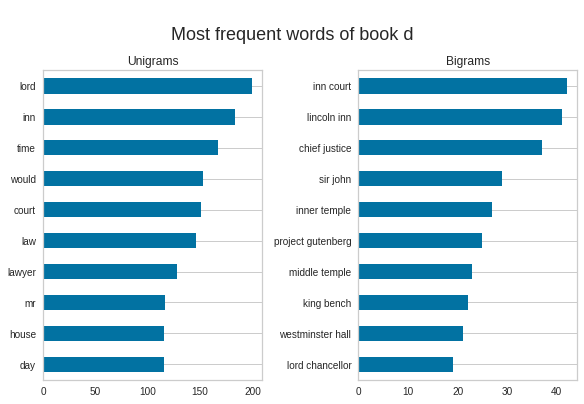

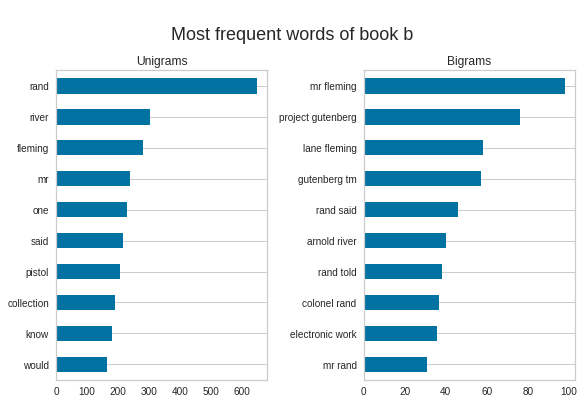

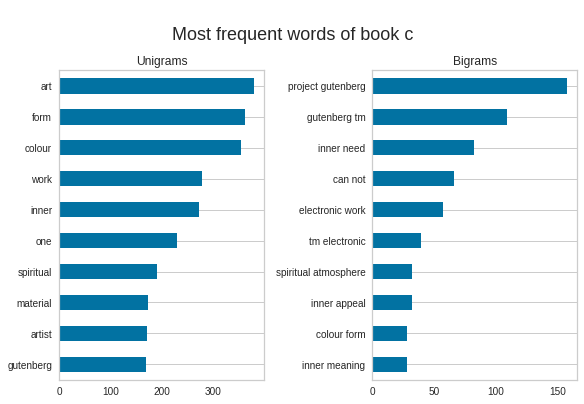

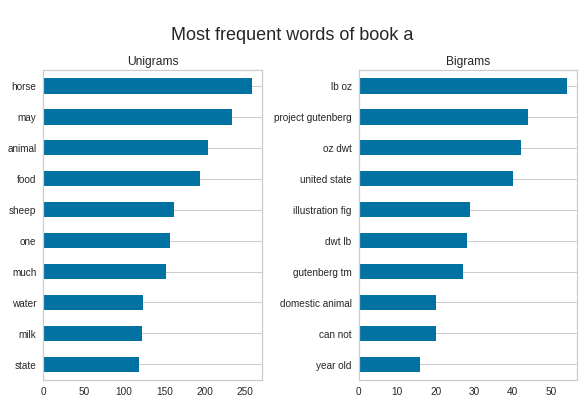

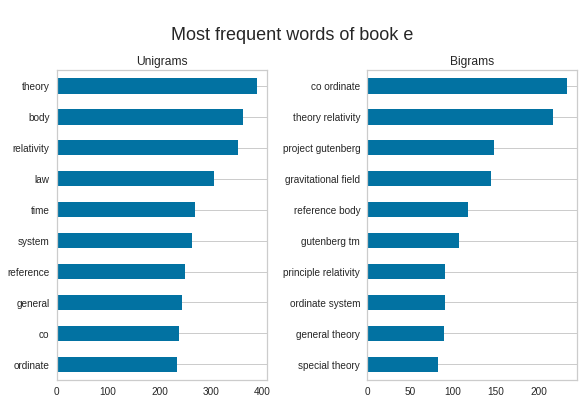

In [8]:

df_top_word = [ ]
df_most_freq=[]
top= 10
for label in df['label'].unique():
    corpus = df[df["label"]==label]["partition"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    fig, ax = plt.subplots(nrows=1, ncols=2,constrained_layout=True)
    fig.suptitle(f"\n Most frequent words of book {label} ", fontsize=18)

    ## unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    df_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_uni_top = pd.DataFrame(dic_words_freq.most_common(50), 
                        columns=["Word","Freq"])
    df_top_word.extend (df_uni_top['Word'].to_numpy())
    df_most_uni_top = pd.DataFrame(dic_words_freq.most_common(10), 
                        columns=["Word","Freq"])
    df_most_freq.extend (df_most_uni_top['Word'].to_numpy())
    #df_top.append(df_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq"))
    
    df_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax[0], 
                    legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
    ## bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    df_bi = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_bi["Word"] = df_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
    df_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
    ax[1].set(ylabel=None)



count the top commen words in books 

In [13]:
#count the word freq in df_top_word
df_top_ = Counter (df_top_word)
# check if the word is common in 2 books or more
counter_top = Counter({k: c for k, c in df_top_.items() if c > 1})
#append words only to newlist
newlist = list()
for i in counter_top.keys():
    newlist.append(i)


word cloud


 WordCloud of book d



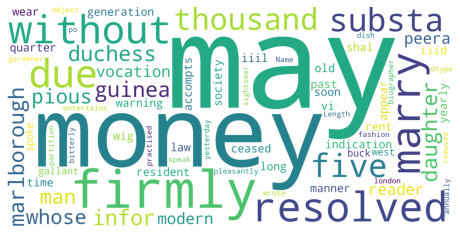


 WordCloud of book b



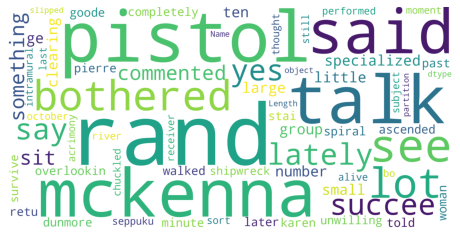


 WordCloud of book c



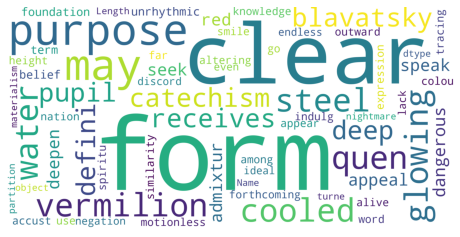


 WordCloud of book a



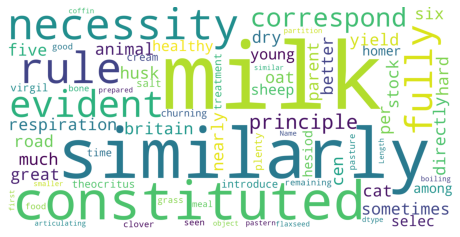


 WordCloud of book e



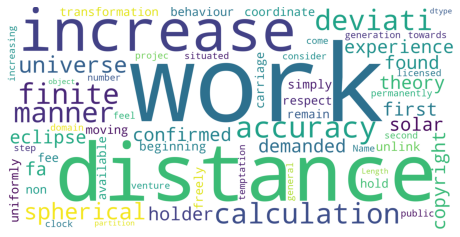

In [14]:
for label in df['label'].unique():
    corpus = df[df["label"]==label]["partition"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    #wordcloud 
    print(f"\n WordCloud of book {label}\n")
    wc = wordcloud.WordCloud(background_color='white', max_words=150,width=1200, height=600, margin=4,scale=2, 
                          max_font_size=None)
    
    wc = wc.generate(str(corpus))
    fig = plt.figure(num=1)
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.show() 

 method to calculat within-cluster distance  

In [15]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
        distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
        return distances

Bag of word


In [16]:
countvec = CountVectorizer()
cdf = countvec.fit_transform(df['partition'])
bow = pd.DataFrame(cdf.toarray(), columns = countvec.get_feature_names())
bow 

aaron  aarvo  ab  abandon  abandoned  ...  zip  zone  zorger  zu  zur
0        0      0   0        0          0  ...    0     0       0   0    0
1        0      0   0        0          0  ...    0     0       0   0    0
2        0      0   0        0          0  ...    0     0       0   0    0
3        0      0   0        0          0  ...    0     0       0   0    0
4        0      0   0        0          0  ...    0     0       0   0    0
..     ...    ...  ..      ...        ...  ...  ...   ...     ...  ..  ...
995      0      0   0        0          0  ...    0     0       0   0    0
996      0      0   0        0          0  ...    0     0       0   0    0
997      0      0   0        0          0  ...    0     0       0   0    0
998      0      0   0        0          0  ...    0     0       0   0    0
999      0      0   0        0          0  ...    0     0       0   0    0

[1000 rows x 12867 columns]

TSNE bow

In [17]:
new_boW_data = cdf.toarray()
tsne_bow = TSNE(n_components=2, verbose=1, random_state=123)
new_bow_tsne = tsne_bow.fit_transform(new_boW_data) 
bow_tsne_t =new_bow_tsne.T

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 1.363s...
[t-SNE] Computed neighbors for 1000 samples in 27.767s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 6.436130
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.021545
[t-SNE] KL divergence after 1000 iterations: 1.107865


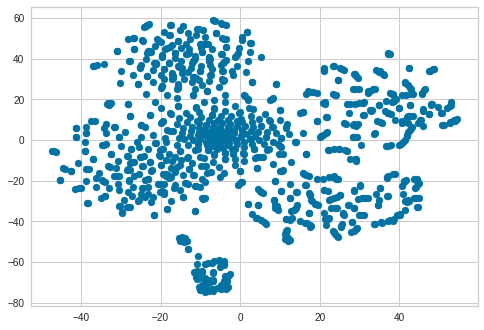

In [18]:
#----------plotting data before clustering--------------
plt.scatter(bow_tsne_t[0] , bow_tsne_t[1] , c ='b')

EM with BOW 

In [24]:
gm_bow = GaussianMixture(n_components=5,covariance_type='full', random_state=123 , max_iter= 10)
labs_bow=gm_bow.fit_predict(new_bow_tsne)
print(labs_bow)


[0 1 2 3 0 0 1 0 2 2 4 2 4 2 2 0 0 3 4 3 2 1 3 4 1 1 2 4 3 1 1 1 4 0 3 0 1
 1 2 0 2 1 1 2 0 0 2 3 2 4 2 2 0 1 3 3 0 0 3 2 3 1 2 1 0 1 0 0 0 1 1 0 4 3
 1 1 0 4 0 0 4 3 3 1 0 0 0 2 0 1 4 1 4 3 0 0 2 3 4 0 0 4 2 2 1 0 0 1 3 1 3
 0 4 2 4 3 1 2 1 4 1 0 4 4 4 4 3 3 3 3 3 0 1 3 0 3 0 1 4 2 1 2 1 4 4 0 0 0
 0 2 1 4 3 2 3 0 2 4 1 2 3 1 1 0 2 2 3 0 4 3 0 0 1 1 2 3 0 0 0 4 2 2 3 4 0
 4 1 1 0 3 0 0 4 0 0 1 0 0 0 0 0 2 0 1 4 4 4 2 2 1 0 0 3 1 1 2 2 2 2 4 1 2
 3 0 0 2 2 3 3 4 1 0 2 4 4 1 2 3 3 2 4 1 0 0 0 4 4 3 3 3 1 4 0 0 0 0 4 1 2
 1 2 4 2 0 2 2 1 1 0 0 2 2 1 4 2 1 1 2 2 3 4 1 4 1 3 1 2 0 4 4 4 4 4 2 2 4
 4 0 4 4 1 1 1 4 4 2 0 2 0 2 3 3 4 0 2 2 1 0 4 0 3 3 0 0 2 1 4 3 0 4 0 2 2
 2 1 3 3 1 1 3 1 4 3 4 2 1 3 1 0 0 0 4 0 4 0 0 1 2 4 4 1 0 4 2 3 3 2 2 2 3
 1 1 2 1 2 3 3 0 0 2 0 2 2 3 4 0 1 4 0 4 0 0 1 0 2 4 3 4 3 4 0 3 0 3 4 0 0
 3 3 0 3 3 2 4 0 3 2 4 2 3 0 3 3 2 0 4 0 0 2 3 1 1 3 3 2 0 0 3 0 1 2 3 3 2
 4 1 2 4 4 1 0 1 3 0 1 1 1 0 0 0 4 1 4 3 3 4 3 3 3 1 3 0 0 2 4 2 2 3 4 2 4
 1 3 4 3 2 3 4 4 0 2 4 2 

Counter({3: 231, 0: 229, 2: 186, 1: 184, 4: 170})


<BarContainer object of 5 artists>

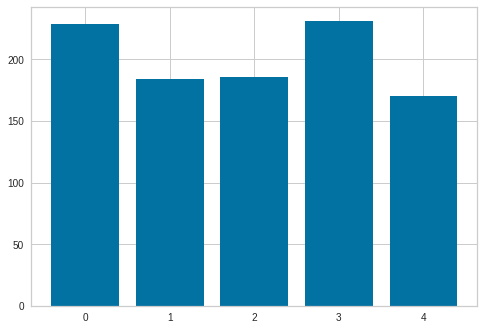

In [26]:
counter_bow_em = Counter(labs_bow)
print(counter_bow_em)
plt.bar(counter_bow_em.keys(), counter_bow_em.values())

silhouette_score EM BOW

In [21]:
score_bow_em = silhouette_score(new_bow_tsne, labs_bow, metric='euclidean')
score_bow_em 

0.44071534

kappa_bow_em

In [22]:
kappa_bow_em = cohen_kappa_score(df['labels_num'], labs_bow)
kappa_bow_em

-0.007500000000000062

Kmeans on bow

In [23]:
kmeans_bow = KMeans(n_clusters = 5, n_init = 5, n_jobs = 1)
identified_clusters_bow = kmeans_bow.fit_predict(new_bow_tsne)
print(identified_clusters_bow)


[1 4 1 3 4 0 4 4 1 1 0 1 0 1 1 0 0 3 0 3 1 4 2 0 4 4 1 0 3 4 4 4 0 4 3 4 4
 4 1 4 1 4 4 1 4 4 1 3 1 0 1 1 4 4 2 3 1 4 3 1 3 4 1 1 4 4 4 4 4 4 4 4 0 3
 1 4 4 0 3 4 0 3 3 4 4 4 4 1 0 4 0 4 0 3 4 4 1 3 0 4 4 0 1 1 4 4 0 4 3 4 3
 4 0 1 0 3 4 1 4 0 4 4 0 0 0 1 2 3 3 2 3 4 4 3 4 3 1 4 0 1 4 1 4 0 0 4 4 4
 4 1 4 0 3 1 3 4 1 0 4 1 3 4 4 4 1 1 3 0 0 2 0 4 4 4 1 3 3 4 3 0 1 1 3 0 4
 0 4 4 4 3 4 4 0 4 1 4 4 4 4 4 4 1 4 4 0 0 0 1 1 4 4 4 3 4 4 1 1 1 1 0 4 1
 3 4 4 1 1 3 3 0 4 4 1 0 0 4 1 2 3 1 0 4 4 1 4 0 0 3 3 2 4 0 4 4 4 1 0 4 1
 4 1 0 1 4 1 1 4 4 3 4 1 1 4 0 1 4 4 1 1 3 0 4 0 4 3 4 1 1 0 0 0 0 0 1 1 0
 0 1 0 0 4 4 1 0 0 1 4 1 4 1 3 3 0 4 1 1 4 0 0 4 2 2 4 0 1 4 0 3 4 0 4 1 1
 1 4 3 3 4 4 3 4 0 3 1 1 4 3 4 4 4 4 0 4 0 4 4 4 1 0 0 4 0 0 1 3 2 1 1 1 2
 4 4 1 4 1 3 3 1 1 1 4 1 1 2 0 4 4 0 1 0 4 4 4 4 1 0 2 0 3 0 4 3 4 2 0 0 4
 3 3 4 3 3 1 0 4 3 1 0 1 2 4 3 2 1 4 0 4 4 1 3 4 4 2 3 1 4 4 2 4 4 1 3 2 1
 0 4 1 0 0 4 4 4 3 4 4 4 4 4 4 4 0 1 0 3 2 0 2 2 3 4 2 4 4 1 0 1 1 3 0 1 0
 4 3 0 3 1 3 0 0 4 1 0 1 

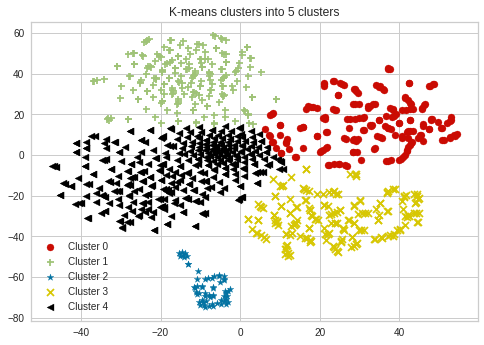

In [25]:
for i in range(0, new_bow_tsne.shape[0]):
  if identified_clusters_bow[i] == 0:
    c1 = pl.scatter(new_bow_tsne[i,0],new_bow_tsne[i,1],c='r', marker='o')
  elif identified_clusters_bow[i] == 1:
    c2 = pl.scatter(new_bow_tsne[i,0],new_bow_tsne[i,1],c='g', marker='+')
  elif identified_clusters_bow[i] == 2:
    c3 = pl.scatter(new_bow_tsne[i,0],new_bow_tsne[i,1],c='b', marker='*')
  elif identified_clusters_bow[i] == 3:
    c4 = pl.scatter(new_bow_tsne[i,0],new_bow_tsne[i,1],c='y', marker='x')
  elif identified_clusters_bow[i] == 4:
    c5 = pl.scatter(new_bow_tsne[i,0],new_bow_tsne[i,1],c='black', marker='<')
pl.legend([c1, c2, c3 , c4 , c5],['Cluster 0', 'Cluster 1',
  'Cluster 2' , 'Cluster 3' , 'Cluster 4',])
pl.title('K-means clusters into 5 clusters')
pl.show()

counter kmean label in each cluster 

Counter({4: 358, 1: 210, 0: 190, 3: 182, 2: 60})


<BarContainer object of 5 artists>

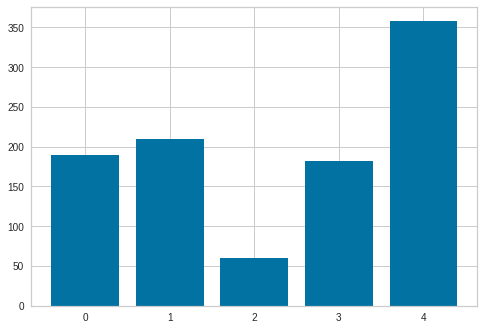

In [27]:
counter_bow_kmeans  = Counter(identified_clusters_bow)
print(counter_bow_kmeans)
plt.bar(counter_bow_kmeans.keys(), counter_bow_kmeans.values())

In [28]:
dists_bow = euclidean_distances(kmeans_bow.cluster_centers_)
kmeans_bow_dists = dists_bow[np.triu_indices(5, 1)]
max_dist_bow, avg_dist_bow, min_dist_bow = kmeans_bow_dists.max(), kmeans_bow_dists.mean(), kmeans_bow_dists.min()
max_dist_bow, avg_dist_bow, min_dist_bow

(102.22277, 61.5054, 44.75382)

In [29]:
centroids_bow = kmeans_bow.cluster_centers_
distances_bow = []
for i, (cx, cy) in enumerate(centroids_bow):
    mean_distance_bow = k_mean_distance(new_bow_tsne, cx, cy, i, identified_clusters_bow)
    distances_bow.append(np.mean(mean_distance_bow)) 
    print (distances_bow)
    distances_bow = [ ]

[15.426574522085652]
[13.48624464336061]
[7.337283049332848]
[14.157251901856768]
[17.23207716606297]


silhouette_score kmeans bow

In [30]:
score_bow = silhouette_score(new_bow_tsne, identified_clusters_bow ,  metric='euclidean')
score_bow

0.4853038

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fac9cc21d10>,
                     model=None)

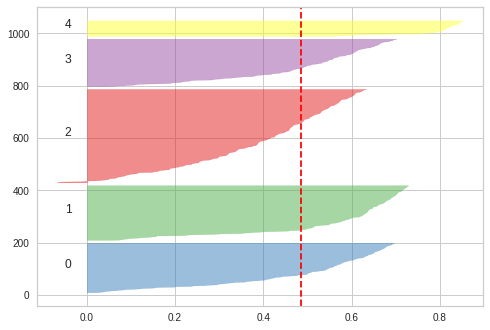

In [31]:
visualizer_bow = SilhouetteVisualizer(kmeans_bow, colors='yellowbrick')
visualizer_bow.fit(new_bow_tsne) 

kappa_bow_kmeans

In [32]:
kappa_bow_kmeans = cohen_kappa_score(df['labels_num'], kmeans_bow.labels_)
kappa_bow_kmeans

0.011249999999999982

Hierarchical BOW

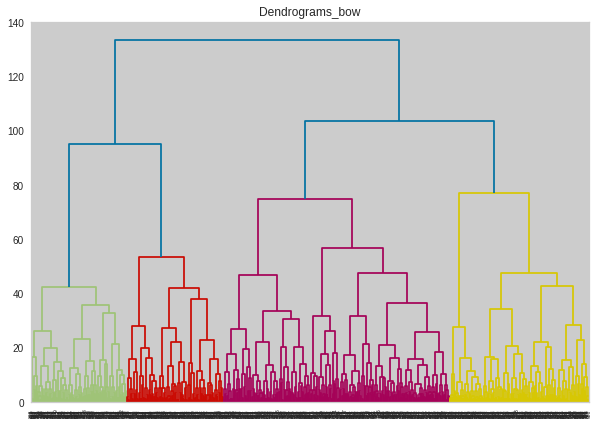

In [33]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms_bow")  
dend_bow= shc.dendrogram(shc.linkage(new_bow_tsne, method='complete'))

In [34]:
cluster_bow = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
cluster_bow_lables=cluster_bow.fit_predict(new_bow_tsne)
cluster_bow_lables

array([0, 0, 3, 2, 2, 0, 0, 0, 3, 3, 1, 3, 1, 3, 3, 0, 0, 2, 1, 2, 3, 0,
       4, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 3, 2, 3, 1, 3, 3, 0, 0, 4, 2, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 3,
       0, 0, 1, 0, 1, 2, 0, 0, 3, 2, 1, 0, 0, 1, 3, 3, 0, 0, 0, 0, 2, 0,
       2, 0, 1, 3, 1, 2, 0, 3, 0, 1, 0, 0, 1, 1, 1, 0, 4, 2, 2, 4, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 3, 0, 3, 0, 1, 1, 0, 0, 0, 0, 3, 0, 1, 2, 3,
       1, 0, 3, 1, 0, 3, 2, 0, 0, 0, 3, 3, 2, 0, 1, 4, 0, 0, 0, 0, 3, 2,
       2, 0, 2, 1, 3, 3, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 0, 1, 1, 1, 3, 3, 0, 0, 0, 2, 0, 0, 3, 0, 3, 3, 1,
       0, 3, 2, 0, 0, 3, 3, 2, 2, 1, 0, 0, 3, 1, 1, 0, 3, 4, 2, 3, 1, 0,
       0, 0, 0, 1, 1, 2, 2, 4, 0, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 3, 0,
       3, 3, 0, 0, 2, 0, 3, 3, 0, 1, 3, 0, 0, 3, 3, 2, 1, 0, 1, 0, 2, 0,
       3, 0, 1, 1, 1, 1, 1, 3, 0, 1, 1, 0, 1, 1, 0,

Counter({0: 405, 2: 190, 1: 173, 3: 172, 4: 60})


<BarContainer object of 5 artists>

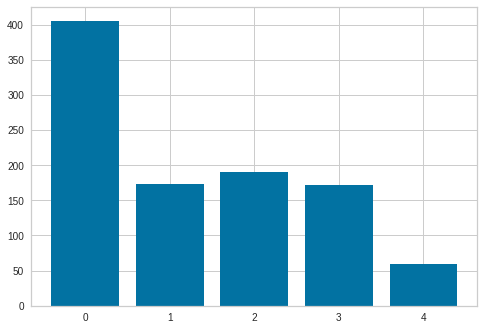

In [35]:
counter_bow_hir = Counter(cluster_bow_lables)
print(counter_bow_hir)
plt.bar(counter_bow_hir.keys(), counter_bow_hir.values())

silhouette_score BOW hir

In [36]:
score_bow_her = silhouette_score(new_bow_tsne, cluster_bow.labels_, metric='euclidean')
score_bow_her 

0.4668748

kappa_bow_hir

In [37]:
kappa_bow_hir = cohen_kappa_score(df['labels_num'], cluster_bow.labels_)
kappa_bow_hir

0.24

#Implementation of TF-IDF

In [38]:
all_sentences = df['partition']

# create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# fit the vectorizer to our sentences 
vects=vectorizer.fit_transform(all_sentences)
#vects
# get features names 
features_names = vectorizer.get_feature_names()

matrix = vects.todense()
denselist = matrix.tolist()

#convert list to dataframe

tf_idf_dataframe = pd.DataFrame(denselist, columns=features_names)
print(f"Final Result of TF-IDF \n {tf_idf_dataframe}")

Final Result of TF-IDF 
      aaron  aarvo   ab  abandon  abandoned  ...  zip  zone  zorger   zu  zur
0      0.0    0.0  0.0      0.0        0.0  ...  0.0   0.0     0.0  0.0  0.0
1      0.0    0.0  0.0      0.0        0.0  ...  0.0   0.0     0.0  0.0  0.0
2      0.0    0.0  0.0      0.0        0.0  ...  0.0   0.0     0.0  0.0  0.0
3      0.0    0.0  0.0      0.0        0.0  ...  0.0   0.0     0.0  0.0  0.0
4      0.0    0.0  0.0      0.0        0.0  ...  0.0   0.0     0.0  0.0  0.0
..     ...    ...  ...      ...        ...  ...  ...   ...     ...  ...  ...
995    0.0    0.0  0.0      0.0        0.0  ...  0.0   0.0     0.0  0.0  0.0
996    0.0    0.0  0.0      0.0        0.0  ...  0.0   0.0     0.0  0.0  0.0
997    0.0    0.0  0.0      0.0        0.0  ...  0.0   0.0     0.0  0.0  0.0
998    0.0    0.0  0.0      0.0        0.0  ...  0.0   0.0     0.0  0.0  0.0
999    0.0    0.0  0.0      0.0        0.0  ...  0.0   0.0     0.0  0.0  0.0

[1000 rows x 12867 columns]


tsne on tfidf

In [39]:
new_tfidf_data = vects.toarray()
tsne_tfidf =tsne = TSNE(n_components=2, verbose=1, random_state=123)
new_tf_tsne = tsne_tfidf.fit_transform(new_tfidf_data)
print(new_tf_tsne)
new_tf_tsne.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 1.791s...
[t-SNE] Computed neighbors for 1000 samples in 29.399s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.405709
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.617363
[t-SNE] KL divergence after 1000 iterations: 0.582023
[[ -3.8917418 -20.576353 ]
 [  7.062816  -16.64977  ]
 [  8.435261  -51.655968 ]
 ...
 [-29.434927   40.932358 ]
 [ -4.0591397 -57.410603 ]
 [ -3.6177402  46.878155 ]]


(1000, 2)

EM TFIDF


In [40]:
gm_tfidf = GaussianMixture(n_components=5,covariance_type='full', random_state=123 , n_init= 10)
labs_tfidf=gm_tfidf.fit_predict(new_tf_tsne)
print(labs_tfidf)

[0 0 4 1 0 0 2 0 4 4 3 4 3 4 4 0 0 1 3 1 4 2 1 3 2 2 4 3 1 2 2 2 3 0 1 0 2
 2 4 0 4 2 2 4 0 1 4 1 4 3 4 4 0 2 1 1 0 0 3 4 1 2 4 0 0 2 0 0 0 2 2 0 3 1
 0 2 0 3 3 2 3 1 1 2 0 0 0 4 0 2 3 2 3 1 2 0 4 1 3 0 0 3 4 4 2 0 0 2 1 2 1
 0 3 4 3 1 2 4 2 3 2 0 3 3 3 3 1 1 1 1 1 0 2 1 0 1 0 2 3 4 2 4 2 3 3 0 0 0
 2 4 2 3 1 4 3 2 4 3 2 4 1 2 2 1 4 4 1 0 3 1 0 0 2 2 4 1 1 0 1 3 4 4 1 3 0
 3 2 2 0 1 2 0 3 0 0 2 0 0 0 0 0 4 0 2 3 3 3 4 4 2 0 0 1 2 2 4 0 4 4 3 2 4
 1 2 0 4 4 1 1 3 2 2 4 3 3 2 4 1 1 4 3 0 0 0 0 3 3 1 1 1 2 3 2 0 0 0 3 2 4
 2 0 3 4 0 4 4 2 2 1 0 4 4 2 3 4 2 2 4 4 1 3 2 3 2 1 2 4 0 3 3 3 3 3 4 4 3
 3 0 3 3 2 2 0 3 3 4 0 4 0 4 1 1 3 0 4 4 2 0 3 0 1 1 0 0 4 2 3 1 0 3 0 4 4
 4 2 1 1 2 2 1 2 3 1 3 4 2 1 2 0 2 0 3 0 3 0 0 2 4 3 3 2 3 3 4 1 1 4 4 4 1
 2 2 4 2 4 1 1 0 0 4 0 4 4 1 3 2 0 3 0 3 0 4 2 0 4 3 1 3 1 3 0 1 0 1 3 0 0
 1 1 1 1 1 4 3 0 1 4 3 4 1 0 1 1 4 0 3 0 4 4 1 2 2 1 1 4 1 4 1 0 2 4 1 1 4
 3 2 4 3 3 2 0 2 1 0 2 2 2 2 1 0 3 0 3 1 1 3 1 1 1 2 1 0 0 4 3 4 4 1 3 4 3
 2 1 3 1 4 1 3 3 0 4 3 4 

Counter({1: 243, 2: 195, 4: 193, 0: 189, 3: 180})


<BarContainer object of 5 artists>

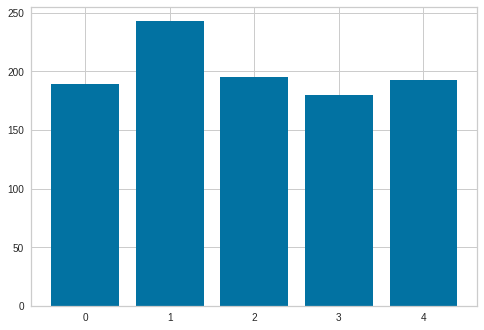

In [41]:
counter_tfidf_em = Counter(labs_tfidf)
print(counter_tfidf_em)
plt.bar(counter_tfidf_em.keys(), counter_tfidf_em.values())

silhouette_score EM TFIDF

In [42]:
score_tfidf_em = silhouette_score(new_tf_tsne, labs_tfidf, metric='euclidean')
score_tfidf_em

0.6324797

kappa_tfidf_em

In [43]:
kappa_tfidf_em = cohen_kappa_score(df['labels_num'], labs_tfidf)
kappa_tfidf_em

-0.2350000000000001

Hierarchical TFIDF

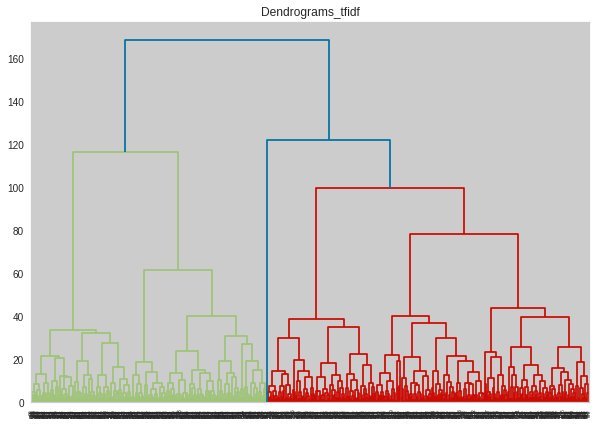

In [44]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms_tfidf")  
dend = shc.dendrogram(shc.linkage(new_tf_tsne, method='complete'))

In [45]:
cluster_tfidf = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
cluster_tfidf_labels=cluster_tfidf.fit_predict(new_tf_tsne)
print(cluster_tfidf_labels)

[0 0 0 1 0 0 4 0 0 0 3 0 3 0 0 0 0 1 3 1 0 4 1 3 4 4 0 3 1 4 4 4 3 0 1 0 4
 4 0 0 0 4 4 0 0 1 0 1 0 3 0 0 0 4 1 1 0 0 3 0 1 4 0 0 0 4 0 0 0 4 4 0 3 1
 0 4 0 3 3 4 3 1 1 4 0 0 0 0 0 4 3 4 3 1 4 0 0 1 3 0 0 3 0 0 4 0 0 4 1 4 1
 0 3 0 3 1 4 0 4 3 4 0 3 3 3 3 1 1 1 1 1 0 4 1 0 1 0 4 3 0 4 0 4 3 3 0 0 0
 4 0 4 3 1 0 3 4 0 3 4 0 1 4 4 1 0 0 1 0 3 1 0 0 4 4 0 1 1 0 1 3 0 0 1 3 0
 3 4 4 0 1 4 0 3 0 0 4 0 0 0 0 0 0 0 4 3 3 3 0 0 4 0 0 1 4 4 0 0 0 0 3 4 0
 1 4 0 0 0 1 1 3 4 4 0 3 3 4 0 1 1 0 3 0 0 0 0 3 3 1 1 1 4 3 4 0 0 0 3 4 0
 4 0 3 0 0 0 0 4 4 1 0 0 0 4 3 0 4 4 0 0 1 3 4 3 4 1 4 0 0 3 3 3 3 3 0 0 3
 3 0 3 3 4 4 0 3 3 0 0 0 0 0 1 1 3 0 0 0 4 0 3 0 1 1 0 0 0 4 3 1 0 3 0 0 0
 0 4 1 1 4 4 1 4 3 1 3 0 4 1 4 0 4 0 3 0 3 0 0 4 0 3 3 4 3 3 0 1 1 0 0 0 1
 4 4 0 4 0 1 1 0 0 0 0 0 0 1 3 4 0 3 0 3 0 0 4 0 0 3 1 3 1 3 0 1 0 1 3 0 0
 1 1 1 1 1 0 3 0 1 0 3 0 1 0 1 1 0 0 3 0 0 0 1 4 4 1 1 0 1 0 1 0 4 0 1 1 0
 3 4 0 3 3 4 0 4 1 0 4 4 4 4 1 0 3 0 3 1 1 3 1 1 1 4 1 0 0 0 3 0 0 1 3 0 3
 4 1 3 1 0 1 3 3 0 0 3 0 

Counter({0: 382, 1: 243, 4: 194, 3: 180, 2: 1})


<BarContainer object of 5 artists>

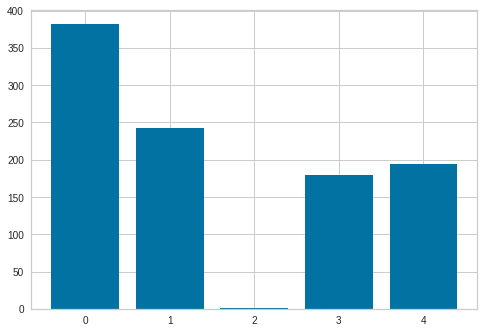

In [46]:
counter_tfidf_hir = Counter(cluster_tfidf_labels)
print(counter_tfidf_hir)
plt.bar(counter_tfidf_hir.keys(), counter_tfidf_hir.values())

silhouette_score TFIDF hir

In [47]:
score_tfidf_hir = silhouette_score(new_tf_tsne, cluster_tfidf.labels_, metric='euclidean')
score_tfidf_hir

0.591682

kappa_tfidf_hir

In [48]:
kappa_tfidf_hir = cohen_kappa_score(df['labels_num'], cluster_tfidf.labels_)
kappa_tfidf_hir

-0.2350000000000001

Kmeans Tfidf

In [49]:
kmeans_tfidf = KMeans(n_clusters = 5, n_init = 5, n_jobs = 1 , random_state=123)
identified_clusters_tfidf = kmeans_tfidf.fit_predict(new_tf_tsne)
print(identified_clusters_tfidf)

[0 0 4 1 0 0 2 0 4 4 3 4 3 4 4 0 0 1 3 1 4 2 1 3 2 2 4 3 1 2 2 2 3 0 1 0 2
 2 4 0 4 2 2 4 0 1 4 1 4 3 4 4 0 2 1 1 0 0 3 4 1 2 4 0 0 2 0 0 0 2 2 0 3 1
 0 2 0 3 3 2 3 1 1 2 0 0 0 4 0 2 3 2 3 1 2 0 4 1 3 0 0 3 4 4 2 0 0 2 1 2 1
 0 3 4 3 1 2 4 2 3 2 0 3 3 3 3 1 1 1 1 1 0 2 1 0 1 0 2 3 4 2 4 2 3 3 0 0 0
 2 4 2 3 1 4 3 2 4 3 2 4 1 2 2 1 4 4 1 0 3 1 0 0 2 2 4 1 1 0 1 3 4 4 1 3 0
 3 2 2 0 1 2 0 3 0 0 2 0 0 0 0 0 4 4 2 3 3 3 4 4 2 0 0 1 2 2 4 0 4 4 3 2 4
 1 2 0 4 4 1 1 3 2 2 4 3 3 2 4 1 1 4 3 0 0 0 0 3 3 1 1 1 2 3 2 0 0 0 3 2 4
 2 0 3 4 0 4 4 2 2 1 0 4 4 2 3 4 2 2 4 4 1 3 2 3 2 1 2 4 0 3 3 3 3 3 4 4 3
 3 0 3 3 2 2 0 3 3 4 0 4 0 4 1 1 3 0 4 4 2 0 3 0 1 1 0 0 4 2 3 1 0 3 0 4 4
 4 2 1 1 2 2 1 2 3 1 3 4 2 1 2 0 2 0 3 0 3 0 0 2 4 3 3 2 3 3 4 1 1 4 4 4 1
 2 2 4 2 4 1 1 0 0 4 0 4 4 1 3 2 0 3 0 3 0 4 2 0 4 3 1 3 1 3 0 1 0 1 3 0 0
 1 1 1 1 1 4 3 0 1 4 3 4 1 0 1 1 4 0 3 0 4 4 1 2 2 1 1 4 1 4 1 0 2 4 1 1 4
 3 2 4 3 3 2 0 2 1 0 2 2 2 2 1 0 3 0 3 1 1 3 1 1 1 2 1 0 0 4 3 4 4 1 3 4 3
 2 1 3 1 4 1 3 3 0 4 3 4 

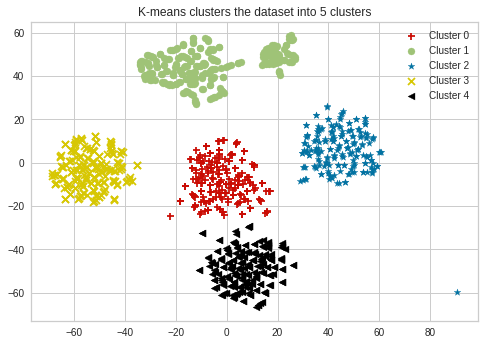

In [51]:
for i in range(0, new_tf_tsne.shape[0]):
  if identified_clusters_tfidf[i] == 0:
    c1 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='r',
    marker='+')
  elif identified_clusters_tfidf[i] == 1:
    c2 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='g',
    marker='o')
  elif identified_clusters_tfidf[i] == 2:
    c3 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='b', marker='*')
  elif identified_clusters_tfidf[i] == 3:
    c4 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='y', marker='x')
  elif identified_clusters_tfidf[i] == 4:
    c5 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='black', marker='<')
pl.legend([c1, c2, c3 , c4 , c5],['Cluster 0', 'Cluster 1',
  'Cluster 2' , 'Cluster 3' , 'Cluster 4',])
pl.title('K-means clusters the dataset into 5 clusters')
pl.show()

Counter({1: 265, 0: 194, 2: 184, 4: 179, 3: 178})


<BarContainer object of 5 artists>

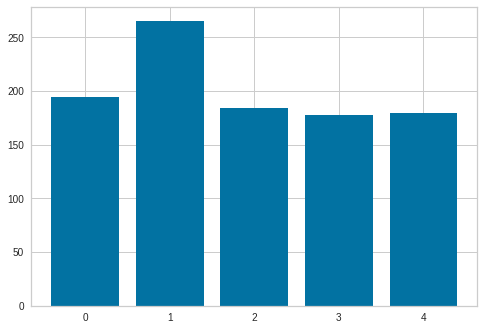

In [ ]:
counter_tfidf_kmeans = Counter(identified_clusters_tfidf)
print(counter_tfidf_kmeans)
plt.bar(counter_tfidf_kmeans.keys(), counter_tfidf_kmeans.values())

In [52]:
#create new data frame with clusters lables for error analysis 
pred_label=kmeans_tfidf.labels_
#df=pd.DataFrame((zip(list_of_random_items, list_label , list_label_num , partition_words)),columns =['partition', 'label' ,'labels_num', 'partition_words'])
clustered_df=pd.DataFrame(zip(df['partition'] , df['labels_num'] , pred_label ) , columns=['partition', 'label' ,'labels_pred'])
clustered_df

partition  label  labels_pred
0    money firmly resolved marry without due substa...      3            0
1    five thousand guinea duchess marlborough infor...      3            0
2    see bothered lot pistol lately yes rand succee...      1            4
3    like glowing steel cooled water vermilion quen...      2            1
4    daughter pious man whose vocation modern peera...      3            0
..                                                 ...    ...          ...
995  practised fashion biographer speak bitterly po...      3            0
996  similarity outward form appear tracing spiritu...      2            1
997  motionless negation even discord like endless ...      2            1
998  rand mckenna chuckled receiver sort slipped on...      1            4
999  lack purpose ideal nightmare materialism turne...      2            1

[1000 rows x 3 columns]

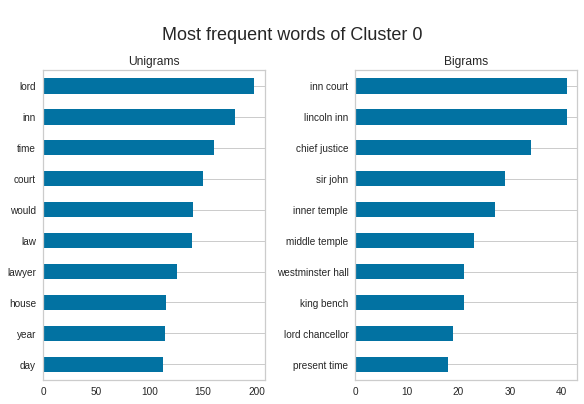

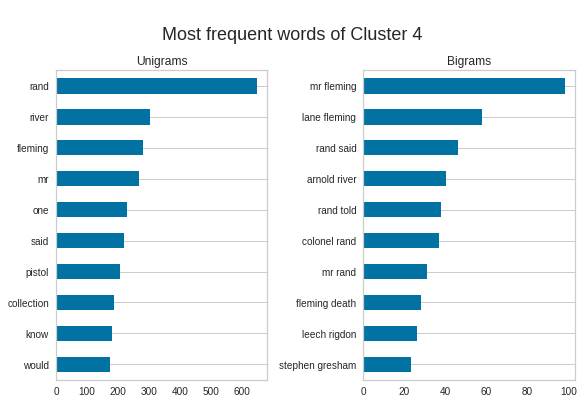

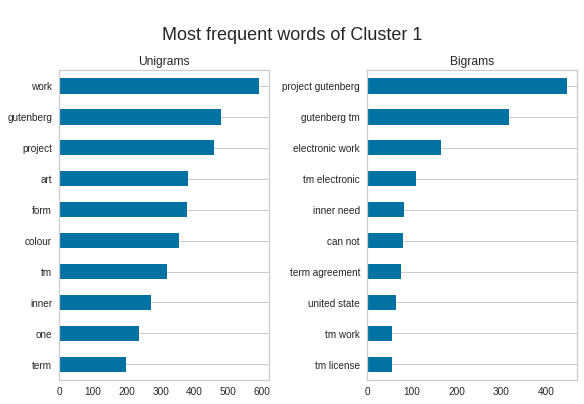

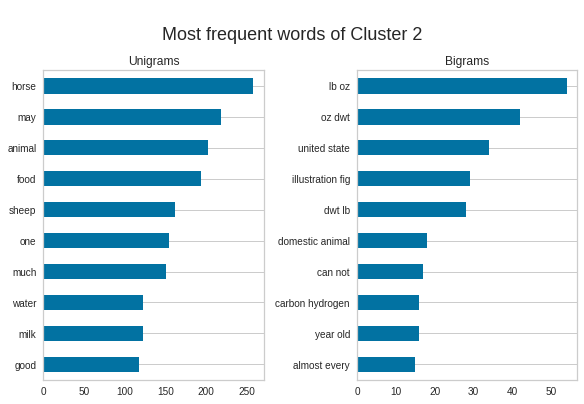

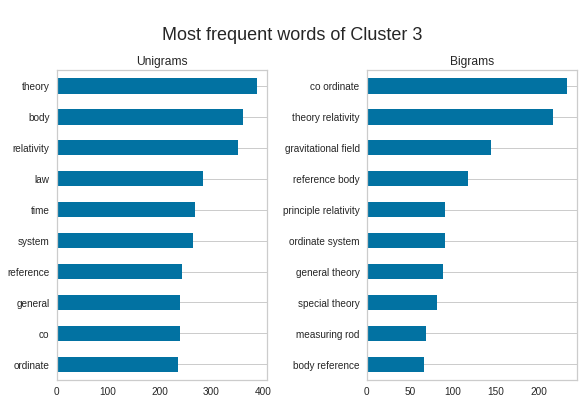

In [53]:
#Analyis clusters word frequency
top= 10
for label in clustered_df['labels_pred'].unique():
    corpus = clustered_df[clustered_df["labels_pred"]==label]["partition"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    fig, ax = plt.subplots(nrows=1, ncols=2,constrained_layout=True)
    fig.suptitle(f"\n Most frequent words of Cluster {label} ", fontsize=18)

    ## unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    df_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax[0], 
                    legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
    ## bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    df_bi = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_bi["Word"] = df_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
    df_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
    ax[1].set(ylabel=None)

word cloud


 WordCloud of book 0



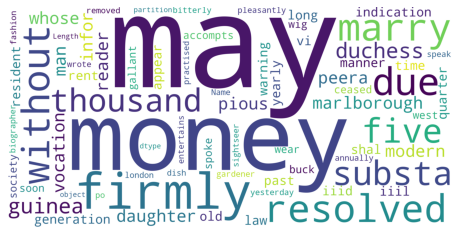


 WordCloud of book 4



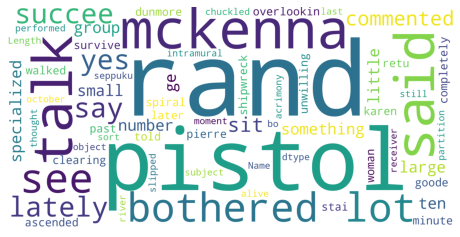


 WordCloud of book 1



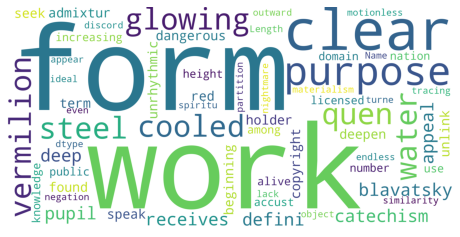


 WordCloud of book 2



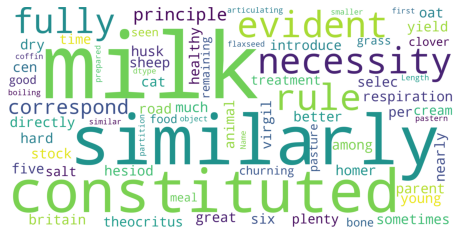


 WordCloud of book 3



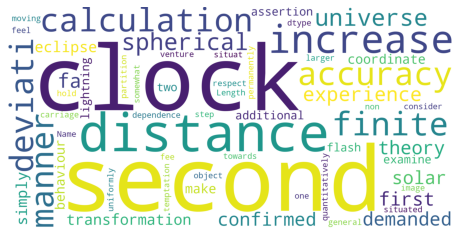

In [55]:
for label in clustered_df['labels_pred'].unique():
    corpus = clustered_df[clustered_df["labels_pred"]==label]["partition"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    #wordcloud 
    print(f"\n WordCloud of book {label}\n")
    wc = wordcloud.WordCloud(background_color='white', max_words=150,width=1200, height=600, margin=4,scale=2, 
                          max_font_size=None)
    
    wc = wc.generate(str(corpus))
    fig = plt.figure(num=1)
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.show() 

In [56]:
dists_tfidf = euclidean_distances(kmeans_tfidf.cluster_centers_)
kmeans_tfidf_dists = dists_tfidf[np.triu_indices(5, 1)]
max_dist_tfidf, avg_dist_tfidf, min_dist_tfidf = kmeans_tfidf_dists.max(), kmeans_tfidf_dists.mean(), kmeans_tfidf_dists.min()
max_dist_tfidf, avg_dist_tfidf, min_dist_tfidf


(98.17898, 66.02229, 41.289494)

In [59]:
centroids_tfidf = kmeans_tfidf.cluster_centers_
distances_tfidf = []
for i, (cx, cy) in enumerate(centroids_tfidf):
    mean_distance_tfidf = k_mean_distance(new_tf_tsne, cx, cy, i, identified_clusters_tfidf)
    distances_tfidf.append(np.mean(mean_distance_tfidf)) 
    print(distances_tfidf)
    distances_tfidf = [ ]

[11.152647780766669]
[17.173565262175675]
[11.400726193480423]
[10.272659072894207]
[10.535902749057161]


In [60]:

score_tfidf_kmeans = silhouette_score(new_tf_tsne, identified_clusters_tfidf, metric='euclidean')
score_tfidf_kmeans

0.63250905

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fac9bffb290>,
                     model=None)

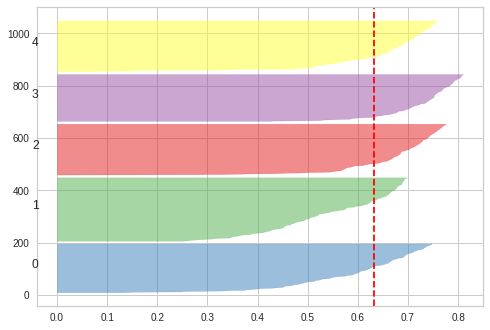

In [61]:
visualizer_tfidf = SilhouetteVisualizer(kmeans_tfidf, colors='yellowbrick')
visualizer_tfidf.fit(new_tf_tsne) 

In [62]:
kappa_tfidf_kmeans = cohen_kappa_score(df['labels_num'], cluster_tfidf.labels_)
kappa_tfidf_kmeans

-0.2350000000000001

WORD2VEC

In [63]:
decument = df['partition_words']
model = Word2Vec(sentences=decument, vector_size=150, workers=3, seed=42)
words = model.wv.index_to_key   #return the words witout repeating
vectors = model.wv.vectors
word_embedding = pd.DataFrame(vectors.T , columns=words)
word_embedding

one      time      work  ...  contentment    repeat  determines
0   -0.042596 -0.169852  0.221399  ...    -0.005509  0.000888    0.001765
1   -0.874701 -1.383760 -1.128245  ...    -0.079540 -0.102456   -0.122509
2    0.167043  0.318601 -0.441287  ...     0.012972  0.004546    0.006192
3   -0.383869 -0.756091  0.271637  ...    -0.031882 -0.037916   -0.044579
4    0.099467  0.128499 -0.533318  ...     0.002094 -0.002518   -0.001648
..        ...       ...       ...  ...          ...       ...         ...
145  0.417920  0.438253  1.107757  ...     0.043875  0.053596    0.050543
146  0.074655  0.008429  1.246382  ...     0.014686  0.031806    0.019027
147  0.165194  0.163162  0.045782  ...     0.009434  0.008371    0.015707
148  0.084071 -0.113049  0.962628  ...     0.010366  0.022855    0.004436
149 -0.130701 -0.046481 -0.442581  ...    -0.012697 -0.014262   -0.018236

[150 rows x 4900 columns]

In [64]:
def vectorize(list_of_docs, model):  #Generate vectors for list of documents using a Word Embedding   
  features = []

  for tokens in list_of_docs:
      zero_vector = np.zeros(model.vector_size)
      vectors = []
      for token in tokens:
          if token in model.wv:
              try:
                  vectors.append(model.wv[token])
              except KeyError:
                  continue
      if vectors:
          vectors = np.asarray(vectors)
          avg_vec = vectors.mean(axis=0)
          features.append(avg_vec)
      else:
          features.append(zero_vector)
  return features        #return list of decument vectors

In [ ]:
vectorized_docs = vectorize(decument, model=model)  
pd.DataFrame(vectorized_docs) 

0         1         2    ...       147       148       149
0    0.047777 -0.497946  0.085608  ... -0.004749  0.016785 -0.100606
1    0.039233 -0.489838  0.103936  ...  0.012674  0.075478 -0.102921
2    0.291940 -0.561621  0.018396  ... -0.231592 -0.010291 -0.004624
3    0.050928 -0.509020  0.092606  ... -0.013763  0.012767 -0.103051
4    0.064234 -0.506192  0.077314  ... -0.019809  0.013391 -0.092461
..        ...       ...       ...  ...       ...       ...       ...
995  0.040009 -0.496749  0.107313  ...  0.020042  0.081153 -0.103617
996  0.038553 -0.508229  0.119843  ...  0.028279  0.125757 -0.108536
997  0.048008 -0.543676  0.111995  ...  0.010823  0.077056 -0.115019
998  0.065099 -0.482765  0.081878  ... -0.012126 -0.015883 -0.070210
999  0.260607 -0.587144 -0.001838  ... -0.167541 -0.055018 -0.008296

[1000 rows x 150 columns]

In [ ]:
new_data_word2vec = vectorized_docs
tsne_word2vec =tsne = TSNE(n_components=2, verbose=1, random_state=123)
new_word2vec_tsne = tsne_tfidf.fit_transform(new_data_word2vec)
print(new_word2vec_tsne)
new_word2vec_tsne.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.011s...
[t-SNE] Computed neighbors for 1000 samples in 0.240s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.070268
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.887123
[t-SNE] KL divergence after 1000 iterations: 0.546500
[[  1.0262407  -9.961885 ]
 [ 31.561014   -3.7750516]
 [-53.11636    11.23041  ]
 ...
 [ 38.404194    9.514264 ]
 [-11.985102  -20.573017 ]
 [-49.013092    8.695202 ]]


(1000, 2)

In [ ]:
gm_word2vec = GaussianMixture(n_components=5,covariance_type='full', random_state=0 , n_init= 10)
labs_word2vec=gm_word2vec.fit_predict(new_word2vec_tsne)
print(labs_word2vec)

[4 2 3 4 4 4 0 4 1 1 2 2 0 4 2 0 4 2 4 1 2 1 4 4 2 4 1 4 2 2 1 2 2 1 1 1 1
 0 2 0 4 0 3 4 4 3 4 4 4 0 4 2 3 4 1 2 3 3 4 1 0 1 2 3 1 1 2 1 1 4 4 4 3 3
 1 4 1 2 3 1 2 2 4 4 4 2 1 4 4 1 3 2 4 1 4 0 3 4 4 1 1 3 0 2 2 1 4 4 4 4 4
 1 4 0 1 1 1 3 4 3 4 4 0 3 2 1 4 0 4 0 2 4 4 1 4 0 1 2 2 0 1 2 3 4 3 3 3 1
 1 3 1 4 1 1 0 2 1 1 0 3 3 0 1 2 4 1 0 2 2 4 3 1 4 1 4 1 1 2 3 3 4 3 1 1 4
 3 1 1 1 4 4 1 1 2 3 3 0 3 0 3 4 4 4 4 4 4 0 4 4 1 1 1 4 3 2 2 4 1 4 1 3 4
 4 4 3 4 1 1 1 2 1 0 2 1 3 3 4 1 2 1 2 1 1 2 4 3 1 3 3 4 0 0 2 1 4 1 3 3 4
 3 2 4 1 4 1 3 1 4 3 2 4 1 4 1 1 1 4 4 1 4 1 1 2 1 2 1 1 1 1 1 3 1 2 1 3 1
 3 3 4 4 2 3 3 1 3 2 4 3 3 1 1 3 1 4 3 1 2 2 4 0 2 1 1 3 3 3 4 1 2 4 4 4 4
 1 0 4 3 3 2 2 2 2 2 1 1 4 1 4 4 3 0 4 0 4 1 4 4 2 2 2 3 0 3 2 0 4 3 4 2 4
 2 3 3 4 2 4 4 4 1 0 1 4 1 4 1 4 4 4 1 1 2 3 2 4 1 3 4 1 2 3 1 4 2 3 2 4 1
 2 1 1 1 2 3 3 3 4 2 3 4 0 4 3 3 1 4 4 4 1 2 2 4 3 1 2 4 1 4 1 3 3 1 3 1 4
 1 2 1 1 3 4 1 2 4 2 1 3 4 1 4 0 0 4 3 4 1 3 3 4 1 3 0 3 1 1 4 1 2 4 0 4 0
 1 2 1 1 3 4 3 1 2 4 4 4 

silhouette_score EM word2vec

In [ ]:
score_word2vec_em = silhouette_score(new_word2vec_tsne, labs_word2vec, metric='euclidean')
score_word2vec_em 

0.60395604

kappa_score_W2V_em

In [ ]:
kappa_score_W2V_em = cohen_kappa_score(df['labels_num'], labs_word2vec)
kappa_score_W2V_em

-0.22124999999999995

In [ ]:
kmeans_w2v = KMeans(n_clusters = 5, n_init = 5, n_jobs = 1)
identified_clusters_w2v = kmeans_w2v.fit_predict(new_word2vec_tsne)
print(identified_clusters_w2v)

[1 0 4 1 1 1 3 1 2 2 0 0 3 1 0 3 1 0 1 2 0 2 1 1 0 1 2 1 0 0 2 0 0 2 2 2 2
 3 0 3 1 3 4 1 1 4 1 1 1 3 1 0 4 1 2 0 4 4 1 2 3 2 0 4 2 2 0 2 2 1 1 1 4 4
 2 1 2 0 4 2 0 0 1 1 1 0 2 1 1 2 4 0 1 2 1 3 4 1 1 2 2 4 3 0 0 2 1 1 1 1 1
 2 1 3 2 2 2 4 1 4 1 1 3 4 0 2 1 3 1 3 0 1 1 2 1 3 2 0 0 3 2 0 4 1 4 4 4 2
 2 4 2 1 2 2 3 0 2 2 3 4 4 3 2 0 1 2 3 0 0 1 4 2 1 2 1 2 2 0 4 4 1 4 2 2 1
 4 2 2 2 1 1 2 2 0 4 4 3 4 3 4 1 1 1 1 1 1 3 1 1 2 2 2 1 4 0 2 1 2 1 2 4 1
 1 1 4 1 2 2 2 0 2 3 0 2 4 4 1 2 0 2 0 2 2 0 1 4 2 4 4 1 3 3 0 2 1 2 4 4 1
 4 0 1 2 1 2 4 2 1 4 0 1 2 1 2 2 2 1 1 2 1 2 2 0 2 0 2 2 2 2 2 4 2 0 2 4 2
 4 4 1 1 0 4 4 2 4 0 1 4 4 2 2 4 2 1 4 2 2 0 1 3 0 2 2 4 4 4 1 2 0 1 1 1 1
 2 3 1 4 4 0 0 0 0 0 2 2 1 2 1 1 4 3 1 3 1 2 1 1 0 0 0 4 3 4 2 3 1 4 1 0 1
 0 4 4 1 0 1 1 1 2 3 2 1 2 1 2 1 1 1 2 2 0 4 0 1 2 4 1 2 0 4 2 1 0 4 0 1 2
 0 2 2 2 0 4 4 4 1 0 4 1 3 1 4 4 2 1 1 1 2 0 0 1 4 2 0 1 1 1 2 4 4 2 4 2 1
 2 0 2 2 4 1 2 0 1 2 2 4 1 2 1 3 3 2 4 1 2 4 4 1 2 4 3 4 2 2 1 2 0 1 3 1 3
 2 0 2 2 4 1 4 2 0 1 1 1 

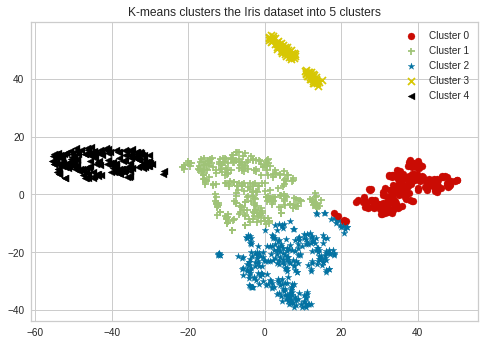

In [ ]:
for i in range(0, new_word2vec_tsne.shape[0]):
  if identified_clusters_w2v[i] == 0:
    c1 = pl.scatter(new_word2vec_tsne[i,0],new_word2vec_tsne[i,1],c='r', marker='o')
  elif identified_clusters_w2v[i] == 1:
    c2 = pl.scatter(new_word2vec_tsne[i,0],new_word2vec_tsne[i,1],c='g', marker='+')
  elif identified_clusters_w2v[i] == 2:
    c3 = pl.scatter(new_word2vec_tsne[i,0],new_word2vec_tsne[i,1],c='b', marker='*')
  elif identified_clusters_w2v[i] == 3:
    c4 = pl.scatter(new_word2vec_tsne[i,0],new_word2vec_tsne[i,1],c='y', marker='x')
  elif identified_clusters_w2v[i] == 4:
    c5 = pl.scatter(new_word2vec_tsne[i,0],new_word2vec_tsne[i,1],c='black', marker='<')
pl.legend([c1, c2, c3 , c4 , c5],['Cluster 0', 'Cluster 1',
  'Cluster 2' , 'Cluster 3' , 'Cluster 4',])
pl.title('K-means clusters the Iris dataset into 5 clusters')
pl.show()

<BarContainer object of 5 artists>

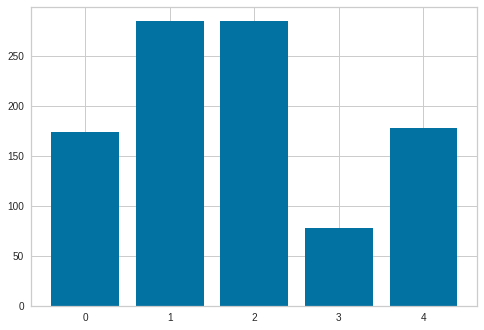

In [ ]:
counter_word2vec  = Counter(identified_clusters_w2v)
counter_word2vec
plt.bar(counter_word2vec.keys(), counter_word2vec.values())

distance between clusters

In [ ]:
dists_w2v = euclidean_distances(kmeans_w2v.cluster_centers_)
kmeans_w2v_dists = dists_w2v[np.triu_indices(5, 1)]
max_dist_w2v, avg_dist_w2v, min_dist_w2v = kmeans_w2v_dists.max(), kmeans_w2v_dists.mean(), kmeans_w2v_dists.min()
max_dist_w2v, avg_dist_w2v, min_dist_w2v

(80.05349, 51.946747, 27.708282)

dist within cluster

In [ ]:
centroids_w2v = kmeans_w2v.cluster_centers_
distances_w2v = []
for i, (cx, cy) in enumerate(centroids_w2v):
    mean_distance_w2v = k_mean_distance(new_word2vec_tsne, cx, cy, i, identified_clusters_w2v)
    distances_w2v.append(np.mean(mean_distance_w2v)) 
    print (distances_w2v)
    distances_w2v = [ ]

[7.480275056546694]
[9.960599404774175]
[9.851546471238187]
[6.070863346426345]
[7.510415789538209]


silhouette_score kmeans w2v

In [ ]:
#########
score_word2vec_kmeans = silhouette_score(new_word2vec_tsne, identified_clusters_w2v, metric='euclidean')
score_word2vec_kmeans

0.6035826

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d588ef990>,
                     model=None)

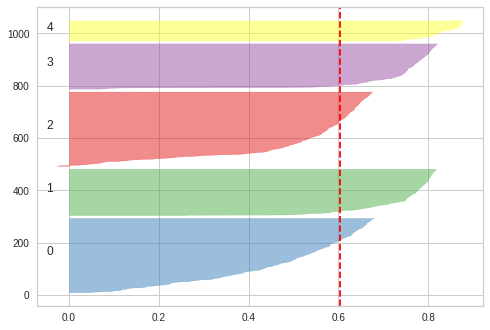

In [ ]:
visualizer_w2v = SilhouetteVisualizer(kmeans_w2v, colors='yellowbrick')
visualizer_w2v.fit(new_word2vec_tsne) 

In [ ]:
kappa_score_W2V_kmeans = cohen_kappa_score(df['labels_num'], identified_clusters_w2v)
kappa_score_W2V_kmeans

0.018750000000000044

Hierarchical clustering model word2vec

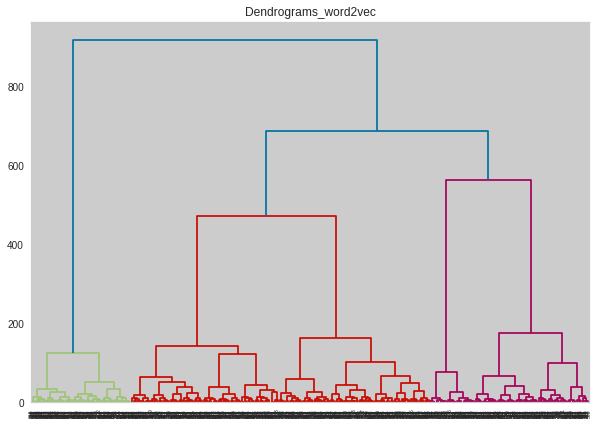

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms_word2vec")  
dend_word2vec= shc.dendrogram(shc.linkage(new_word2vec_tsne, method='ward'))

In [ ]:
cluster_word2vec= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster_word2vec.fit_predict(new_word2vec_tsne)

array([2, 0, 4, 2, 2, 2, 3, 2, 1, 1, 0, 0, 3, 2, 0, 3, 2, 0, 2, 1, 0, 1,
       2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 3, 0, 3, 0, 3, 4, 2,
       2, 4, 2, 0, 2, 3, 2, 0, 4, 2, 1, 0, 4, 4, 2, 1, 3, 1, 0, 4, 1, 1,
       0, 1, 1, 2, 2, 2, 4, 4, 1, 2, 1, 0, 4, 1, 0, 0, 2, 2, 2, 0, 1, 2,
       2, 1, 4, 0, 2, 1, 2, 3, 4, 2, 2, 1, 1, 4, 3, 0, 0, 1, 2, 2, 2, 2,
       0, 1, 2, 3, 1, 1, 1, 4, 2, 4, 2, 2, 3, 4, 0, 1, 2, 3, 2, 3, 0, 2,
       2, 1, 2, 3, 1, 0, 0, 3, 1, 0, 4, 2, 4, 4, 4, 1, 1, 4, 1, 2, 1, 1,
       3, 0, 0, 1, 3, 4, 4, 3, 1, 0, 2, 1, 3, 0, 0, 2, 4, 1, 2, 1, 2, 1,
       1, 0, 4, 4, 2, 4, 1, 1, 2, 4, 1, 1, 1, 2, 2, 1, 1, 0, 4, 4, 3, 4,
       3, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 4, 0, 0, 2, 1, 2, 1,
       4, 2, 2, 2, 4, 2, 1, 1, 1, 0, 1, 3, 0, 1, 4, 4, 2, 1, 0, 1, 0, 1,
       1, 0, 2, 4, 1, 4, 4, 0, 3, 3, 0, 1, 2, 1, 4, 4, 2, 4, 0, 2, 1, 2,
       1, 4, 1, 2, 4, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 4, 1, 0, 1, 4, 1, 4, 4, 2, 2, 0,

In [ ]:
score_word2vec_her = silhouette_score(new_word2vec_tsne, cluster_word2vec.labels_, metric='euclidean')
score_word2vec_her 

0.6017583

In [ ]:
kappa_score_W2V_hir = cohen_kappa_score(df['labels_num'], cluster_word2vec.labels_)
kappa_score_W2V_hir

0.16374999999999995

LDA

In [ ]:
countvec_lda = CountVectorizer()
cdf_lda = countvec_lda.fit_transform(df['partition'])

In [ ]:
ldamodel = lda.LDA(n_topics=5, n_iter=10, random_state=1)
ldamodel.fit(cdf_lda)
lda_representation = ldamodel.doc_topic_

INFO:lda:n_documents: 1000
INFO:lda:vocab_size: 12796
INFO:lda:n_words: 149486
INFO:lda:n_topics: 5
INFO:lda:n_iter: 10
INFO:lda:<0> log likelihood: -1597345
INFO:lda:<9> log likelihood: -1301291


In [ ]:
lda_representation_df =  pd.DataFrame(lda_representation)
lda_representation_df

0         1         2         3         4
0    0.113621  0.392691  0.093688  0.352824  0.047176
1    0.161204  0.167893  0.622742  0.047492  0.000669
2    0.598671  0.047176  0.033887  0.200000  0.120266
3    0.200000  0.173422  0.246512  0.326246  0.053821
4    0.040532  0.399336  0.312957  0.213289  0.033887
..        ...       ...       ...       ...       ...
995  0.106977  0.093688  0.731561  0.047176  0.020598
996  0.087043  0.120266  0.751495  0.040532  0.000664
997  0.121070  0.167893  0.549164  0.080936  0.080936
998  0.040532  0.605316  0.166777  0.133555  0.053821
999  0.788552  0.000673  0.000673  0.034343  0.175758

[1000 rows x 5 columns]

In [ ]:
new_data_lda = lda_representation
tsne_lda =tsne = TSNE(n_components=2, verbose=1, random_state=123)
new_lda_tsne = tsne_lda.fit_transform(new_data_lda)
print(new_lda_tsne)
new_lda_tsne.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.071921
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.401913
[t-SNE] KL divergence after 1000 iterations: 0.588511
[[-18.25591   -13.357643 ]
 [-14.280396   36.639114 ]
 [ 39.037052  -21.838993 ]
 ...
 [-11.468989   32.48895  ]
 [ -3.6584666 -17.691664 ]
 [ 48.940567  -28.772188 ]]


(1000, 2)

Hierarchical LDA

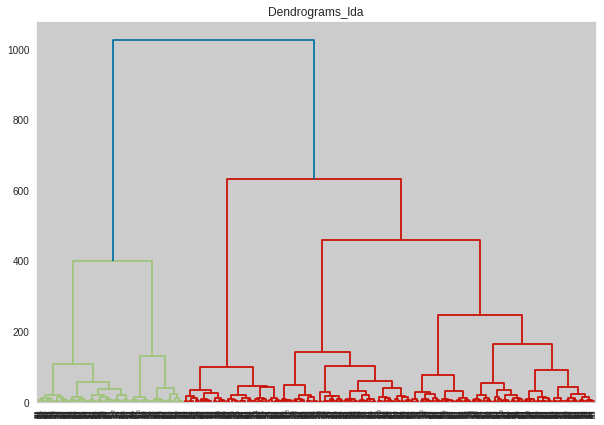

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms_lda")  
dend_lda= shc.dendrogram(shc.linkage(new_lda_tsne, method='ward'))

In [ ]:
cluster_lda= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster_lda_hier=cluster_lda.fit_predict(new_lda_tsne)
cluster_lda_hier

array([0, 2, 4, 1, 0, 0, 3, 0, 0, 1, 2, 2, 1, 0, 2, 3, 0, 2, 1, 0, 2, 0,
       0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 3, 2, 3, 1, 3, 4, 0,
       1, 4, 1, 0, 1, 3, 0, 2, 4, 0, 1, 2, 4, 4, 0, 1, 3, 0, 2, 4, 1, 1,
       2, 1, 1, 1, 1, 1, 4, 4, 3, 1, 0, 2, 4, 0, 2, 2, 3, 0, 0, 2, 1, 0,
       3, 1, 4, 2, 1, 1, 0, 3, 4, 1, 0, 1, 1, 4, 3, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 3, 1, 1, 0, 4, 0, 4, 1, 0, 3, 4, 2, 0, 0, 3, 0, 4, 2, 0,
       1, 1, 1, 3, 0, 2, 2, 3, 1, 2, 4, 0, 4, 4, 4, 3, 3, 4, 1, 0, 0, 1,
       1, 2, 2, 1, 3, 4, 4, 3, 0, 0, 0, 0, 3, 0, 2, 0, 3, 1, 0, 0, 0, 0,
       0, 2, 4, 4, 1, 4, 0, 0, 0, 4, 1, 1, 0, 0, 3, 1, 0, 2, 4, 4, 1, 4,
       3, 4, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 3, 0, 0, 1, 1, 2, 4, 3, 2, 0, 4, 4, 0, 0, 2, 0, 2, 3,
       1, 2, 1, 4, 0, 4, 4, 0, 3, 3, 2, 1, 0, 1, 4, 4, 1, 4, 2, 0, 0, 0,
       0, 4, 1, 0, 4, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 3, 1, 2, 1, 4, 1, 4, 4, 0, 0, 2,

Counter({0: 329, 1: 233, 2: 174, 4: 167, 3: 97})


<BarContainer object of 5 artists>

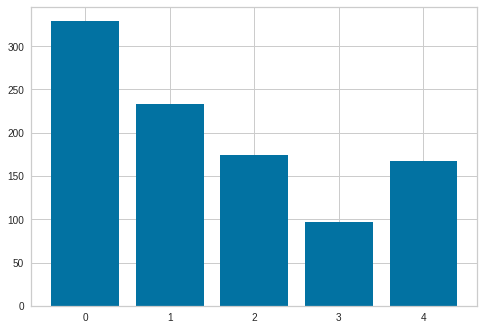

In [ ]:
counter_lda_hier= Counter(cluster_lda_hier)
print(counter_lda_hier)
plt.bar(counter_lda_hier.keys(), counter_lda_hier.values())

In [ ]:
score_lda_her = silhouette_score(new_lda_tsne, cluster_lda.labels_, metric='euclidean')
score_lda_her 

0.5381887

In [ ]:
kappa_score_lda_hir = cohen_kappa_score(df['labels_num'], cluster_lda.labels_)
kappa_score_lda_hir

-0.007500000000000062

Kmeans on LDA

In [ ]:
kmeans_lda = KMeans(n_clusters=5, random_state=42 )
clusters_lda_kmeans = kmeans_lda.fit_predict(new_lda_tsne)
clusters_lda_kmeans

array([2, 0, 3, 2, 2, 1, 4, 4, 1, 2, 0, 0, 2, 1, 0, 4, 4, 0, 2, 1, 0, 2,
       4, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 4, 0, 4, 2, 4, 3, 1,
       2, 3, 2, 1, 2, 4, 1, 0, 3, 1, 2, 0, 3, 3, 1, 2, 4, 1, 0, 3, 2, 2,
       0, 2, 2, 2, 2, 2, 3, 3, 4, 2, 1, 0, 3, 1, 0, 0, 4, 1, 1, 0, 2, 1,
       4, 2, 3, 0, 2, 2, 1, 4, 3, 2, 1, 2, 2, 3, 4, 0, 0, 2, 1, 1, 4, 2,
       1, 1, 4, 4, 2, 2, 1, 3, 4, 3, 2, 1, 4, 3, 0, 1, 1, 4, 1, 3, 0, 2,
       2, 2, 2, 4, 1, 0, 0, 4, 2, 0, 3, 4, 3, 3, 3, 4, 4, 3, 2, 1, 1, 2,
       2, 0, 0, 2, 4, 3, 3, 4, 1, 1, 1, 1, 4, 2, 0, 4, 4, 2, 1, 1, 1, 1,
       2, 0, 3, 3, 2, 3, 1, 1, 1, 3, 2, 2, 1, 1, 4, 2, 1, 0, 3, 3, 2, 3,
       4, 3, 2, 1, 1, 1, 1, 2, 2, 4, 2, 1, 1, 2, 2, 4, 0, 1, 4, 1, 1, 1,
       3, 4, 1, 1, 4, 1, 1, 2, 2, 0, 3, 4, 0, 1, 3, 3, 4, 1, 0, 1, 0, 4,
       2, 0, 2, 3, 1, 3, 3, 1, 4, 4, 0, 2, 4, 2, 3, 3, 2, 3, 0, 1, 1, 1,
       1, 3, 2, 4, 3, 0, 4, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 4, 2, 0, 2, 3, 2, 3, 3, 1, 1, 0,

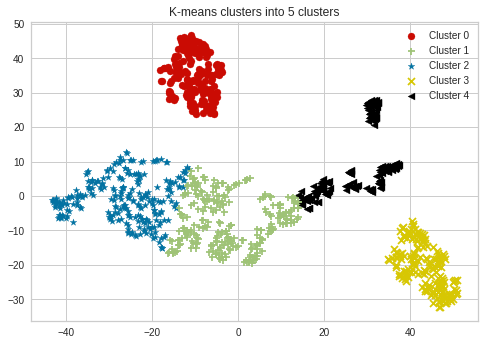

In [ ]:
for i in range(0, new_lda_tsne.shape[0]):
  if clusters_lda_kmeans[i] == 0:
    c1 = pl.scatter(new_lda_tsne[i,0],new_lda_tsne[i,1],c='r', marker='o')
  elif clusters_lda_kmeans[i] == 1:
    c2 = pl.scatter(new_lda_tsne[i,0],new_lda_tsne[i,1],c='g', marker='+')
  elif clusters_lda_kmeans[i] == 2:
    c3 = pl.scatter(new_lda_tsne[i,0],new_lda_tsne[i,1],c='b', marker='*')
  elif clusters_lda_kmeans[i] == 3:
    c4 = pl.scatter(new_lda_tsne[i,0],new_lda_tsne[i,1],c='y', marker='x')
  elif clusters_lda_kmeans[i] == 4:
    c5 = pl.scatter(new_lda_tsne[i,0],new_lda_tsne[i,1],c='black', marker='<')
pl.legend([c1, c2, c3 , c4 , c5],['Cluster 0', 'Cluster 1',
  'Cluster 2' , 'Cluster 3' , 'Cluster 4',])
pl.title('K-means clusters into 5 clusters')
pl.show()

<BarContainer object of 5 artists>

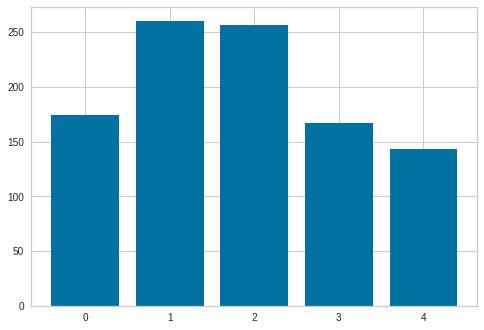

In [ ]:
counter_lda  = Counter(clusters_lda_kmeans)
counter_lda
plt.bar(counter_lda.keys(), counter_lda.values())

silhouette_score kmeans LDA

In [ ]:
score_lda_kmeans = silhouette_score(new_lda_tsne, clusters_lda_kmeans , metric='euclidean')
score_lda_kmeans

0.55573034

In [ ]:
kappa_score_lda_kmeans = cohen_kappa_score(df['labels_num'], clusters_lda_kmeans)
kappa_score_lda_kmeans

-0.18999999999999995

distance between clusters

In [ ]:
dists_lda = euclidean_distances(kmeans_lda.cluster_centers_)
kmeans_lda_dists = dists_lda[np.triu_indices(5, 1)]
max_dist, avg_dist, min_dist = kmeans_lda_dists.max(), kmeans_lda_dists.mean(), kmeans_lda_dists.min()
max_dist, avg_dist, min_dist

(77.29372, 47.309032, 25.349405)

 within-cluster distance 

In [ ]:
centroids_lda = kmeans_w2v.cluster_centers_
distances_lda = []
for i, (cx, cy) in enumerate(centroids_lda):
    mean_distance_lda = k_mean_distance(new_lda_tsne, cx, cy, i, clusters_lda_kmeans)
    distances_lda.append(np.mean(mean_distance_lda)) 
    print (distances_lda)
    distances_lda = [ ]

[33.28715842486613]
[45.601734926779805]
[40.06999444990568]
[23.775601212947763]
[43.623739675651315]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d7a7884d0>,
                     model=None)

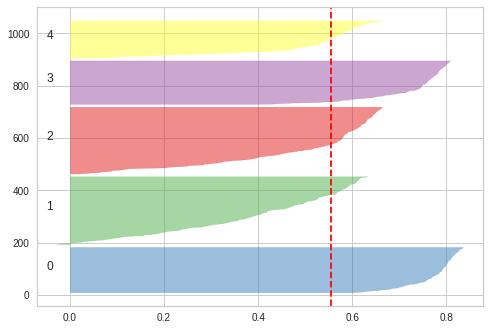

In [ ]:
visualizer_word2vec = SilhouetteVisualizer(kmeans_lda, colors='yellowbrick')
visualizer_word2vec.fit(new_lda_tsne)  

In [ ]:
#EM implemention
gm_lda = GaussianMixture(n_components=5,covariance_type='full', random_state=0 , max_iter= 100)
cluster_lda_em=gm_lda.fit_predict(new_lda_tsne)
print(cluster_lda_em)

[3 4 2 1 1 3 0 0 3 1 4 4 1 3 4 0 0 4 1 3 4 1 0 1 4 3 1 1 4 4 1 4 4 3 3 3 3
 0 4 0 1 0 2 3 1 2 1 1 1 0 0 4 2 3 1 4 2 2 3 1 0 3 4 2 1 1 4 1 1 1 1 1 2 2
 0 1 3 4 2 3 4 4 0 3 3 4 1 1 0 1 2 4 1 1 3 0 2 1 3 1 1 2 0 4 4 1 3 1 0 1 3
 3 0 0 1 1 3 2 0 2 3 3 0 2 4 3 3 0 3 2 4 3 1 1 1 0 3 4 4 0 3 4 2 0 2 2 2 0
 0 2 1 3 3 1 1 4 4 3 0 2 2 0 3 1 3 1 0 1 4 0 0 1 3 3 3 3 3 4 2 2 1 2 3 3 3
 2 1 1 3 3 0 1 3 4 2 2 1 2 0 2 1 3 3 0 3 1 1 0 3 3 3 1 1 0 4 3 0 3 3 3 2 0
 3 3 0 3 1 3 1 4 2 0 4 3 2 2 0 3 4 3 4 0 1 4 1 2 3 2 2 3 0 0 4 1 0 1 2 2 1
 2 4 3 3 3 1 2 1 0 2 4 0 4 3 3 1 1 1 3 1 1 1 1 4 3 4 3 3 3 3 1 0 1 4 1 2 1
 2 2 3 3 4 2 2 1 2 4 3 2 2 1 1 2 1 3 2 4 4 4 3 0 4 3 3 2 2 2 1 3 4 1 1 3 3
 1 0 1 2 2 4 4 4 4 4 1 3 3 3 3 1 2 0 3 0 3 3 1 3 4 4 4 2 1 2 4 0 3 2 0 4 3
 3 2 2 3 4 0 0 0 3 0 1 1 0 0 1 3 1 0 3 3 4 2 4 0 1 2 3 1 3 2 1 0 4 2 1 0 1
 4 1 1 1 1 2 2 2 3 4 2 1 1 1 2 2 1 1 0 0 3 4 4 3 2 3 4 3 0 0 3 2 2 1 2 1 1
 1 4 1 1 2 3 1 4 3 4 1 2 3 4 3 0 0 1 2 1 3 2 2 3 1 2 0 2 1 3 0 1 4 3 0 1 1
 3 4 3 1 2 1 2 3 4 3 3 3 

Counter({3: 259, 1: 252, 4: 174, 2: 167, 0: 148})


<BarContainer object of 5 artists>

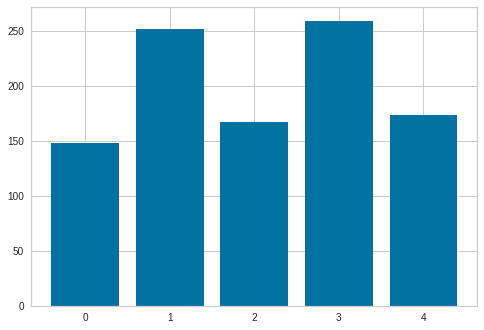

In [ ]:
counter_lda_em= Counter(cluster_lda_em)
print(counter_lda_em)
plt.bar(counter_lda_em.keys(), counter_lda_em.values())

In [ ]:
score_lda_em = silhouette_score(new_lda_tsne, cluster_lda_em , metric='euclidean')
score_lda_em

0.5374375

In [ ]:
kappa_score_lda_em = cohen_kappa_score(df['labels_num'], cluster_lda_em)
kappa_score_lda_em

-0.05750000000000011

LDA topic modeling

In [ ]:
#create dictionary
dictionary = corpora.Dictionary(df['partition_words'])
print(dictionary)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(12803 unique tokens: ['absurd', 'adoption', 'ancient', 'bald', 'bar']...) from 1000 documents (total 149791 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary(12803 unique tokens: ['absurd', 'adoption', 'ancient', 'bald', 'bar']...) from 1000 documents (total 149791 corpus positions)", 'datetime': '2021-10-31T02:36:57.366789', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}


Dictionary(12803 unique tokens: ['absurd', 'adoption', 'ancient', 'bald', 'bar']...)


In [ ]:
#create document term matrix
corpus = [dictionary.doc2bow(doc) for doc in df['partition_words'] ]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 2), (8, 1), (9, 6), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 10), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 3), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 2), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 3), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 6), (107, 1), (108, 1), (109, 4), (110, 1)

In [ ]:
id2word = dictionary.id2token
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 12803
Number of documents: 1000


In [ ]:
lda = gensim.models.ldamodel.LdaModel
num_topics=5
%time ldamodel = lda(corpus, num_topics=num_topics, id2word=dictionary, passes=50 ,minimum_probability=0 , chunksize=100, per_word_topics=True)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 5 topics, 50 passes over the supplied corpus of 1000 documents, updating model once every 100 documents, evaluating perplexity every 1000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #100/1000
INFO:gensim.models.ldamodel:merging changes from 100 documents into a model of 1000 documents
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.009*"work" + 0.008*"gutenberg" + 0.006*"project" + 0.004*"one" + 0.004*"time" + 0.004*"may" + 0.004*"tm" + 0.004*"segment" + 0.003*"continuum" + 0.003*"point"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.006*"form" + 0.006*"rand" + 0.005*"one" + 0.004*"may" + 0.004*"well" + 0.004*"time" + 0.004*"gutenberg" + 0.003*"fleming" + 0.003*"

CPU times: user 45.2 s, sys: 1.21 s, total: 46.5 s
Wall time: 55.5 s


In [ ]:
ldamodel.print_topics(num_topics=num_topics)

INFO:gensim.models.ldamodel:topic #0 (0.200): 0.007*"lord" + 0.006*"time" + 0.005*"mr" + 0.005*"year" + 0.005*"law" + 0.005*"one" + 0.005*"court" + 0.004*"judge" + 0.004*"sir" + 0.004*"lawyer"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.014*"art" + 0.013*"colour" + 0.010*"form" + 0.008*"one" + 0.008*"inner" + 0.008*"spiritual" + 0.007*"artist" + 0.006*"red" + 0.005*"soul" + 0.005*"material"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.022*"rand" + 0.010*"river" + 0.009*"fleming" + 0.007*"mr" + 0.007*"said" + 0.007*"one" + 0.006*"would" + 0.006*"know" + 0.006*"pistol" + 0.005*"collection"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.043*"gutenberg" + 0.041*"project" + 0.038*"work" + 0.028*"tm" + 0.015*"electronic" + 0.013*"foundation" + 0.011*"term" + 0.010*"agreement" + 0.009*"copy" + 0.008*"literary"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.007*"body" + 0.007*"time" + 0.007*"theory" + 0.006*"relativity" + 0.006*"point" + 0.006*"may" + 0.006*"two" + 0.005*"one" + 0.005

[(0,
  '0.007*"lord" + 0.006*"time" + 0.005*"mr" + 0.005*"year" + 0.005*"law" + 0.005*"one" + 0.005*"court" + 0.004*"judge" + 0.004*"sir" + 0.004*"lawyer"'),
 (1,
  '0.014*"art" + 0.013*"colour" + 0.010*"form" + 0.008*"one" + 0.008*"inner" + 0.008*"spiritual" + 0.007*"artist" + 0.006*"red" + 0.005*"soul" + 0.005*"material"'),
 (2,
  '0.022*"rand" + 0.010*"river" + 0.009*"fleming" + 0.007*"mr" + 0.007*"said" + 0.007*"one" + 0.006*"would" + 0.006*"know" + 0.006*"pistol" + 0.005*"collection"'),
 (3,
  '0.043*"gutenberg" + 0.041*"project" + 0.038*"work" + 0.028*"tm" + 0.015*"electronic" + 0.013*"foundation" + 0.011*"term" + 0.010*"agreement" + 0.009*"copy" + 0.008*"literary"'),
 (4,
  '0.007*"body" + 0.007*"time" + 0.007*"theory" + 0.006*"relativity" + 0.006*"point" + 0.006*"may" + 0.006*"two" + 0.005*"one" + 0.005*"motion" + 0.005*"reference"')]

In [ ]:
top_topics = ldamodel.top_topics(corpus)
# print(len(top_topics[2]))
top_topics

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 1000 documents


[([(0.04307746, 'gutenberg'),
   (0.04101896, 'project'),
   (0.038042318, 'work'),
   (0.028128982, 'tm'),
   (0.014797787, 'electronic'),
   (0.012616837, 'foundation'),
   (0.011467923, 'term'),
   (0.010116414, 'agreement'),
   (0.008900515, 'copy'),
   (0.007867338, 'literary'),
   (0.0074808495, 'license'),
   (0.0074354946, 'paragraph'),
   (0.0073077246, 'fee'),
   (0.007287234, 'archive'),
   (0.0070001953, 'full'),
   (0.0068621156, 'may'),
   (0.006339009, 'state'),
   (0.005928361, 'trademark'),
   (0.0059192413, 'access'),
   (0.0057710367, 'agree')],
  -0.808419074098431),
 ([(0.022017447, 'rand'),
   (0.00968176, 'river'),
   (0.008825038, 'fleming'),
   (0.0074694715, 'mr'),
   (0.007405401, 'said'),
   (0.0065210396, 'one'),
   (0.006347093, 'would'),
   (0.00632318, 'know'),
   (0.00613102, 'pistol'),
   (0.004838517, 'collection'),
   (0.0047447244, 'like'),
   (0.004629792, 'well'),
   (0.004268897, 'get'),
   (0.0038489704, 'think'),
   (0.0038200929, 'could'),
   

In [ ]:
lda_display = gensimvis.prepare(ldamodel, corpus, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=ldamodel, corpus= corpus, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 1000 documents



Coherence Score:  -1.4144943950226074


#Error analysis

Removing the most frequent common words from all book’s partitions

In [ ]:
word_join = [ ]
#Remove the common words from all books partitions
df['partition_words'] = df['partition_words'].apply(lambda x: [item for item in x if item not in newlist])
for word in df['partition_words'] :
  for i in word :
    join = " ".join(word)
  word_join.append(join)

print(len(word_join))

1000


In [ ]:
df['partition']=word_join

Word Frequancy

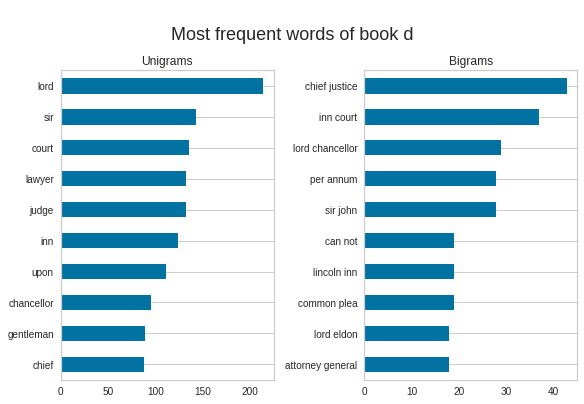

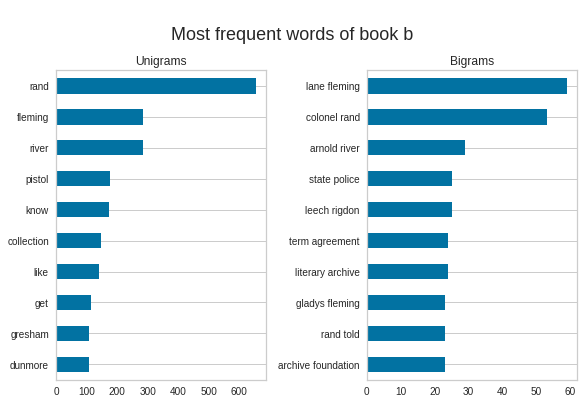

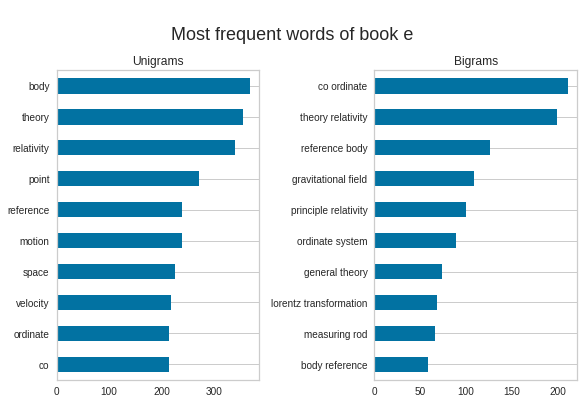

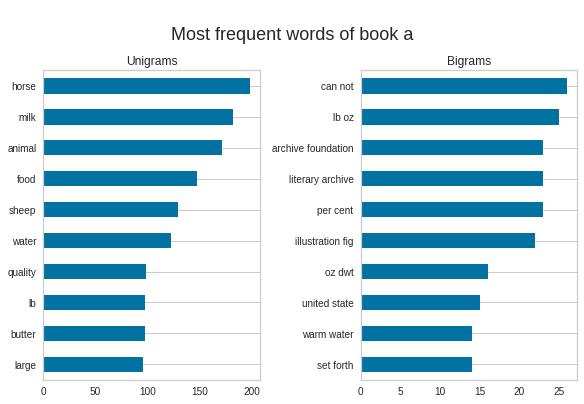

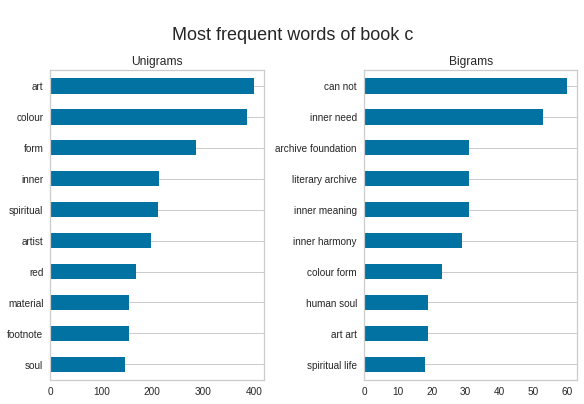

In [ ]:

df_top_word = [ ]
top= 10
for label in df['label'].unique():
    corpus = df[df["label"]==label]["partition"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    fig, ax = plt.subplots(nrows=1, ncols=2,constrained_layout=True)
    fig.suptitle(f"\n Most frequent words of book {label} ", fontsize=18)

    ## unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    df_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_uni_top = pd.DataFrame(dic_words_freq.most_common(50), 
                        columns=["Word","Freq"])
    df_top_word.extend (df_uni_top['Word'].to_numpy())
    #df_top.append(df_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq"))
    
    df_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax[0], 
                    legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
    ## bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    df_bi = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_bi["Word"] = df_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
    df_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
    ax[1].set(ylabel=None)



count the top commen words in books for further 

In [ ]:
#count the word freq in df_top_word
df_top_ = Counter (df_top_word)
# check if the word is common in 2 books or more
counter_top = Counter({k: c for k, c in df_top_.items() if c > 1})
#append words only to newlist
newlist = list()
for i in counter_top.keys():
    newlist.append(i)


In [ ]:
newlist

['upon',
 'case',
 'men',
 'even',
 'le',
 'young',
 'life',
 'like',
 'something',
 'way',
 'state',
 'another',
 'light',
 'thus',
 'small',
 'every',
 'value',
 'use']

#Implementation of TF-IDF

In [ ]:
all_sentences = df['partition']

# create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# fit the vectorizer to our sentences 
vects=vectorizer.fit_transform(all_sentences)
#vects
# get features names 
features_names = vectorizer.get_feature_names()

matrix = vects.todense()
denselist = matrix.tolist()

#convert list to dataframe

tf_idf_dataframe = pd.DataFrame(denselist, columns=features_names)
print(f"Final Result of TF-IDF \n {tf_idf_dataframe}")

Final Result of TF-IDF 
      aah  aaron  aarvo   ab  abandon  ...  zip  zoller  zone   zu  zur
0    0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
1    0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
2    0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
3    0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
4    0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
..   ...    ...    ...  ...      ...  ...  ...     ...   ...  ...  ...
995  0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
996  0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
997  0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
998  0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
999  0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0

[1000 rows x 12766 columns]


tsne on tfidf

In [ ]:
new_tfidf_data = vects.toarray()
tsne_tfidf =tsne = TSNE(n_components=2, verbose=1, random_state=123)
new_tf_tsne = tsne_tfidf.fit_transform(new_tfidf_data)
print(new_tf_tsne)
new_tf_tsne.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 1.248s...
[t-SNE] Computed neighbors for 1000 samples in 30.760s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.405599
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.597420
[t-SNE] KL divergence after 1000 iterations: 0.572042
[[  3.884302   -3.7123117]
 [-39.20591   -31.6299   ]
 [ 51.15423    -8.37949  ]
 ...
 [-50.321278  -14.752452 ]
 [  8.278062   51.05401  ]
 [ 56.035435    4.1851263]]


(1000, 2)

EM TFIDF


In [ ]:
gm_tfidf = GaussianMixture(n_components=5,covariance_type='full', random_state=0 , n_init= 10)
labs_tfidf=gm_tfidf.fit_predict(new_tf_tsne)
print(labs_tfidf)

[1 2 4 3 1 0 1 0 0 3 2 2 1 0 2 1 0 2 3 1 2 1 0 3 2 0 2 3 2 2 3 2 2 1 0 1 1
 1 2 1 1 1 4 0 3 4 3 1 3 1 0 2 4 0 3 2 4 4 0 3 1 1 2 4 1 1 2 1 3 3 3 3 4 4
 0 3 0 2 4 1 2 2 0 0 0 2 3 1 0 3 4 2 3 3 0 1 4 1 0 3 3 4 1 2 2 3 1 1 0 1 1
 1 0 1 1 3 0 4 0 4 3 1 1 4 2 1 0 1 0 1 2 1 3 3 3 1 1 2 2 1 1 2 4 4 4 4 4 0
 0 4 3 0 1 3 1 2 2 3 1 4 4 1 1 2 0 1 1 2 2 0 4 3 0 1 1 0 3 2 4 4 3 4 1 1 0
 4 1 3 1 0 0 3 0 2 4 4 1 4 1 4 3 0 0 0 1 3 1 0 0 0 1 1 3 4 2 1 0 1 0 3 4 0
 0 0 4 0 3 1 3 2 3 1 2 1 4 4 0 3 2 3 2 0 1 2 3 4 0 4 4 1 1 1 2 3 0 3 4 4 1
 4 2 0 1 1 1 4 3 0 4 2 0 3 0 1 2 3 1 1 3 1 1 1 2 1 2 3 0 1 1 1 4 3 2 3 4 3
 4 4 0 0 2 4 4 3 4 2 0 4 4 1 3 4 1 0 4 2 2 2 0 1 2 1 1 4 4 4 3 3 2 3 3 1 1
 1 1 3 4 4 2 2 2 2 2 3 1 1 3 0 1 4 1 0 1 0 1 3 1 2 2 2 4 1 4 2 1 0 4 0 2 0
 1 4 4 1 2 0 0 0 0 1 2 1 0 0 3 0 3 0 1 3 2 4 2 0 3 4 1 3 1 4 1 0 2 4 1 0 3
 2 3 1 3 2 4 4 4 0 2 4 3 1 3 4 4 3 3 0 0 1 2 2 3 4 1 2 0 0 0 1 4 4 3 4 1 1
 3 2 3 3 4 1 3 2 0 2 3 4 0 3 0 1 1 1 4 3 1 4 4 0 3 4 1 4 3 1 0 3 2 0 1 1 1
 0 2 1 3 4 3 4 1 2 0 1 0 

silhouette_score EM TFIDF

In [ ]:
score_tfidf_em = silhouette_score(new_tf_tsne, labs_tfidf, metric='euclidean')
score_tfidf_em

0.6184547

kappa_tfidf_em

In [ ]:
kappa_tfidf_em = cohen_kappa_score(df['labels_num'], labs_tfidf)
kappa_tfidf_em

-0.006250000000000089

Hierarchical TFIDF

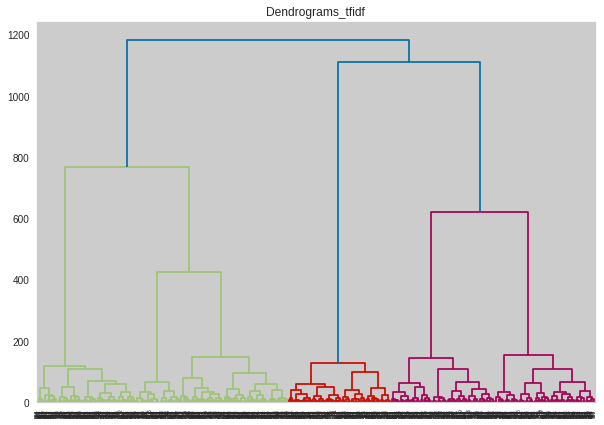

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms_tfidf")  
dend = shc.dendrogram(shc.linkage(new_tf_tsne, method='ward'))

In [ ]:
cluster_tfidf = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster_tfidf.fit_predict(new_tf_tsne)

array([0, 2, 3, 4, 0, 1, 0, 1, 1, 4, 2, 2, 0, 1, 2, 0, 1, 2, 4, 0, 2, 0,
       1, 4, 2, 1, 2, 4, 2, 2, 4, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 1,
       4, 3, 4, 0, 4, 0, 1, 2, 3, 1, 4, 2, 3, 3, 1, 4, 0, 0, 2, 3, 0, 0,
       2, 0, 4, 4, 4, 4, 3, 3, 1, 4, 1, 2, 3, 0, 2, 2, 1, 1, 1, 2, 4, 0,
       1, 4, 3, 2, 4, 4, 1, 0, 3, 0, 1, 4, 4, 3, 0, 2, 2, 4, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 4, 1, 3, 1, 3, 4, 0, 0, 3, 2, 0, 1, 0, 1, 0, 2, 0,
       4, 4, 4, 0, 0, 2, 2, 0, 0, 2, 3, 3, 3, 3, 3, 1, 1, 3, 4, 1, 0, 4,
       0, 2, 2, 4, 0, 3, 3, 0, 0, 2, 1, 0, 0, 2, 2, 1, 3, 4, 1, 0, 0, 1,
       4, 2, 3, 3, 4, 3, 0, 0, 1, 3, 0, 4, 0, 1, 1, 4, 1, 2, 3, 3, 0, 3,
       0, 3, 4, 1, 1, 1, 0, 4, 0, 1, 1, 1, 0, 0, 4, 3, 2, 0, 1, 0, 1, 4,
       3, 1, 1, 1, 3, 1, 4, 0, 4, 2, 4, 0, 2, 0, 3, 3, 1, 4, 2, 4, 2, 1,
       0, 2, 4, 3, 1, 3, 3, 0, 0, 0, 2, 4, 1, 4, 3, 3, 0, 3, 2, 1, 0, 0,
       0, 3, 4, 1, 3, 2, 1, 4, 1, 0, 2, 4, 0, 0, 4, 0, 0, 0, 2, 0, 2, 4,
       1, 0, 0, 0, 3, 4, 2, 4, 3, 4, 3, 3, 1, 1, 2,

silhouette_score TFIDF hir

In [ ]:
score_tfidf_hir = silhouette_score(new_tf_tsne, cluster_tfidf.labels_, metric='euclidean')
score_tfidf_hir

0.6184547

kappa_tfidf_hir

In [ ]:
kappa_tfidf_hir = cohen_kappa_score(df['labels_num'], cluster_tfidf.labels_)
kappa_tfidf_hir

-0.23124999999999996

Kmeans Tfidf

In [ ]:
kmeans_tfidf = KMeans(n_clusters = 5, n_init = 5, n_jobs = 1)
identified_clusters_tfidf = kmeans_tfidf.fit_predict(new_tf_tsne)
print(identified_clusters_tfidf)

[3 1 0 2 3 4 3 4 4 2 1 1 3 4 1 3 4 1 2 3 1 3 4 2 1 4 1 2 1 1 2 1 1 3 4 3 3
 3 1 3 3 3 0 4 2 0 2 3 2 3 4 1 0 4 2 1 0 0 4 2 3 3 1 0 3 3 1 3 2 2 2 2 0 0
 4 2 4 1 0 3 1 1 4 4 4 1 2 3 4 2 0 1 2 2 4 3 0 3 4 2 2 0 3 1 1 2 3 3 4 3 3
 3 4 3 3 2 4 0 4 0 2 3 3 0 1 1 4 3 4 3 1 3 2 2 2 3 3 1 1 3 3 1 0 0 0 0 0 4
 4 0 2 4 3 2 3 1 1 2 3 0 0 3 3 1 4 3 3 1 1 4 0 2 4 3 3 4 2 1 0 0 2 0 3 3 4
 0 3 2 3 4 4 2 4 1 0 0 3 0 3 0 2 4 4 4 3 2 3 4 4 4 3 3 2 0 1 3 4 3 4 2 0 4
 4 4 0 4 2 3 2 1 2 3 1 3 0 0 4 2 1 2 1 4 3 1 2 0 4 0 0 3 3 3 1 2 4 2 0 0 3
 0 1 4 3 3 3 0 2 4 0 1 4 2 4 3 1 2 3 3 2 3 3 3 1 3 1 2 4 3 3 3 0 2 1 2 0 2
 0 0 4 4 1 0 0 2 0 1 4 0 0 3 2 0 3 4 0 1 1 1 4 3 1 3 3 0 0 0 2 2 1 2 2 3 3
 3 3 2 0 0 1 1 1 1 1 2 3 3 2 4 3 0 3 4 3 4 3 2 3 1 1 1 0 3 0 1 3 4 0 4 1 4
 3 0 0 3 1 4 4 4 4 3 1 3 4 4 2 4 2 4 3 2 1 0 1 4 2 0 3 2 3 0 3 4 1 0 3 4 2
 1 2 3 2 1 0 0 0 4 1 0 2 3 2 0 0 2 2 4 4 3 1 1 2 0 3 1 4 4 4 3 0 0 2 0 3 3
 2 1 2 2 0 3 2 1 4 1 2 0 4 2 4 3 3 3 0 2 3 0 0 4 2 0 3 0 2 3 4 2 1 4 3 3 3
 4 1 3 2 0 2 0 3 1 4 3 4 

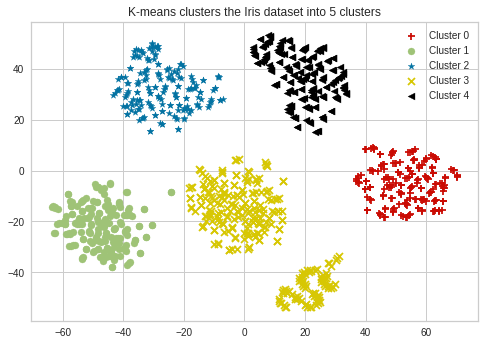

In [ ]:
for i in range(0, new_tf_tsne.shape[0]):
  if identified_clusters_tfidf[i] == 0:
    c1 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='r',
    marker='+')
  elif identified_clusters_tfidf[i] == 1:
    c2 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='g',
    marker='o')
  elif identified_clusters_tfidf[i] == 2:
    c3 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='b', marker='*')
  elif identified_clusters_tfidf[i] == 3:
    c4 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='y', marker='x')
  elif identified_clusters_tfidf[i] == 4:
    c5 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='black', marker='<')
pl.legend([c1, c2, c3 , c4 , c5],['Cluster 0', 'Cluster 1',
  'Cluster 2' , 'Cluster 3' , 'Cluster 4',])
pl.title('K-means clusters the dataset into 5 clusters')
pl.show()

Counter({3: 272, 1: 185, 2: 185, 4: 180, 0: 178})


<BarContainer object of 5 artists>

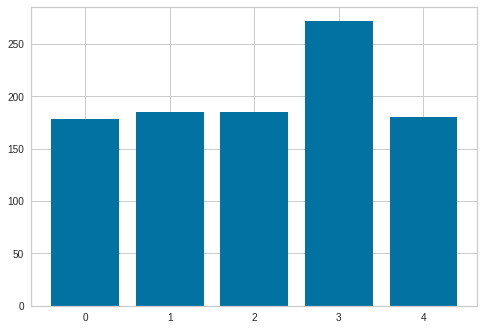

In [ ]:
counter_tfidf = Counter(identified_clusters_tfidf)
print(counter_tfidf)
plt.bar(counter_tfidf.keys(), counter_tfidf.values())

In [ ]:
#create new data frame with clusters lables for error analysis 
clustered_df=pd.DataFrame(df['partition'])
clustered_df['label']=kmeans_tfidf.labels_

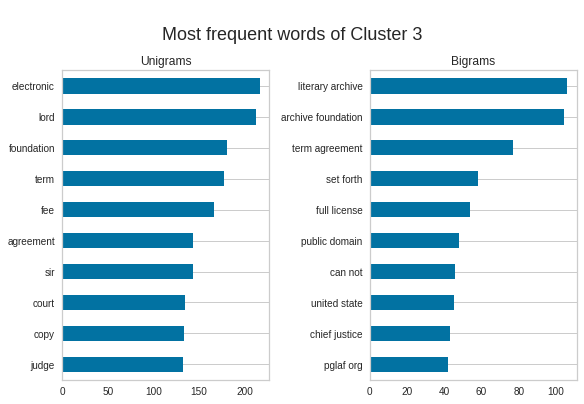

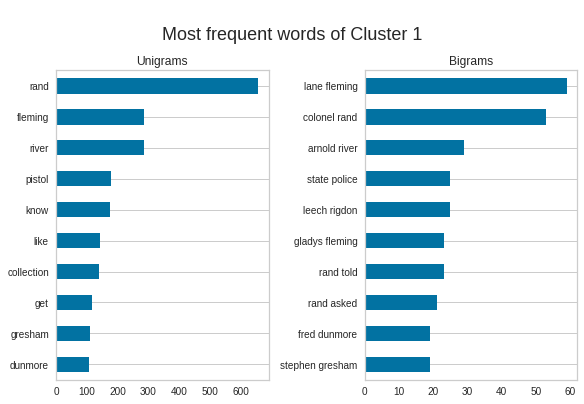

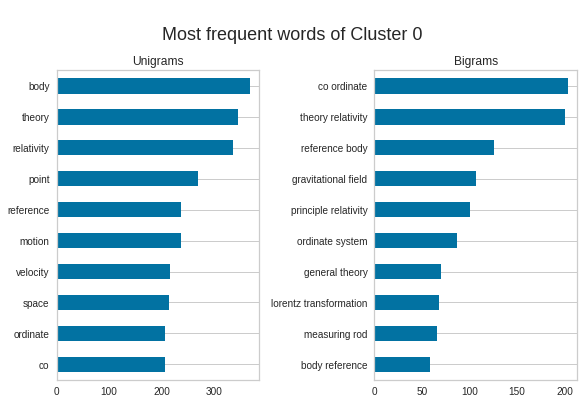

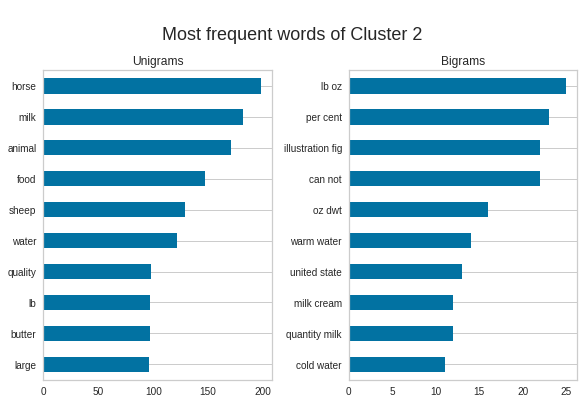

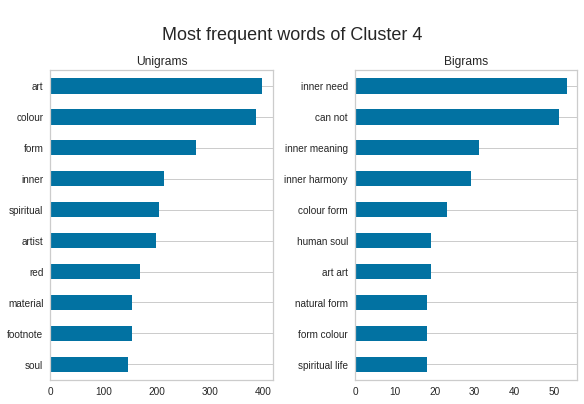

In [ ]:
#Analyis clusters word frequency
top= 10
for label in clustered_df['label'].unique():
    corpus = clustered_df[clustered_df["label"]==label]["partition"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    fig, ax = plt.subplots(nrows=1, ncols=2,constrained_layout=True)
    fig.suptitle(f"\n Most frequent words of Cluster {label} ", fontsize=18)

    ## unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    df_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax[0], 
                    legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
    ## bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    df_bi = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_bi["Word"] = df_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
    df_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
    ax[1].set(ylabel=None)

word cloud


 WordCloud of book 3



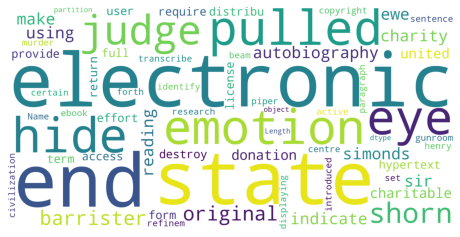


 WordCloud of book 1



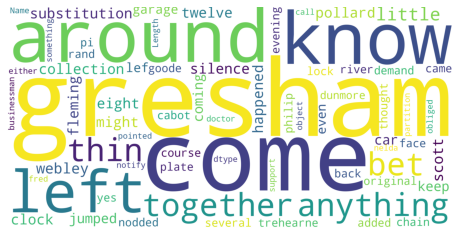


 WordCloud of book 0



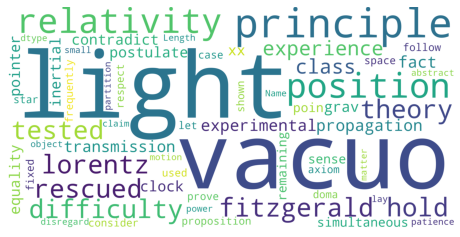


 WordCloud of book 2



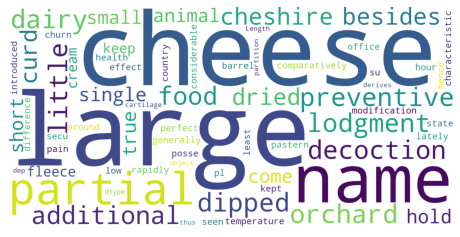


 WordCloud of book 4



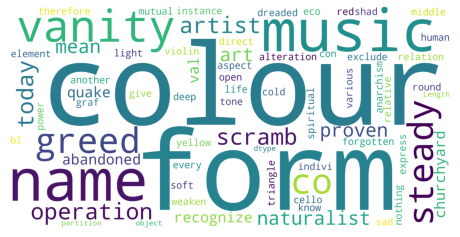

In [ ]:
for label in clustered_df['label'].unique():
    corpus = clustered_df[clustered_df["label"]==label]["partition"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    #wordcloud 
    print(f"\n WordCloud of book {label}\n")
    wc = wordcloud.WordCloud(background_color='white', max_words=150,width=1200, height=600, margin=4,scale=2, 
                          max_font_size=None)
    
    wc = wc.generate(str(corpus))
    fig = plt.figure(num=1)
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.show() 

In [ ]:
dists_tfidf = euclidean_distances(kmeans_tfidf.cluster_centers_)
kmeans_tfidf_dists = dists_tfidf[np.triu_indices(5, 1)]
max_dist_tfidf, avg_dist_tfidf, min_dist_tfidf = kmeans_tfidf_dists.max(), kmeans_tfidf_dists.mean(), kmeans_tfidf_dists.min()
max_dist_tfidf, avg_dist_tfidf, min_dist_tfidf

(102.10816, 66.792274, 46.07057)

In [ ]:

score_tfidf_kmeans = silhouette_score(new_tf_tsne, identified_clusters_tfidf, metric='euclidean')
score_tfidf_kmeans

0.6185599

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d736d7090>,
                     model=None)

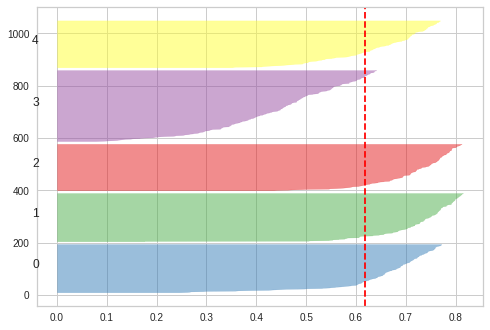

In [ ]:
visualizer_tfidf = SilhouetteVisualizer(kmeans_tfidf, colors='yellowbrick')
visualizer_tfidf.fit(new_tf_tsne) 

In [ ]:
kappa_tfidf_kmeans = cohen_kappa_score(df['labels_num'], cluster_tfidf.labels_)
kappa_tfidf_kmeans

-0.23124999999999996

Remove the most frequent 10 words 

In [ ]:
df_most_freq

['lord',
 'time',
 'mr',
 'law',
 'one',
 'sir',
 'court',
 'judge',
 'lawyer',
 'year',
 'rand',
 'river',
 'fleming',
 'mr',
 'said',
 'one',
 'would',
 'pistol',
 'know',
 'work',
 'body',
 'theory',
 'relativity',
 'point',
 'time',
 'motion',
 'reference',
 'law',
 'space',
 'velocity',
 'may',
 'horse',
 'milk',
 'animal',
 'one',
 'food',
 'gutenberg',
 'work',
 'sheep',
 'project',
 'art',
 'colour',
 'form',
 'work',
 'one',
 'inner',
 'spiritual',
 'artist',
 'red',
 'footnote']

Removing the most frequent common words from all book’s partitions

In [ ]:
word_join = [ ]
#Remove the common words from all books partitions
df['partition_words'] = df['partition_words'].apply(lambda x: [item for item in x if item not in df_most_freq])
for word in df['partition_words'] :
  for i in word :
    join = " ".join(word)
  word_join.append(join)

print(len(word_join))

1000


In [ ]:
df['partition']=word_join

#Implementation of TF-IDF

In [ ]:
all_sentences = df['partition']

# create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# fit the vectorizer to our sentences 
vects=vectorizer.fit_transform(all_sentences)
#vects
# get features names 
features_names = vectorizer.get_feature_names()

matrix = vects.todense()
denselist = matrix.tolist()

#convert list to dataframe

tf_idf_dataframe = pd.DataFrame(denselist, columns=features_names)
print(f"Final Result of TF-IDF \n {tf_idf_dataframe}")

Final Result of TF-IDF 
      aah  aaron  aarvo   ab  abandon  ...  zip  zoller  zone   zu  zur
0    0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
1    0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
2    0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
3    0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
4    0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
..   ...    ...    ...  ...      ...  ...  ...     ...   ...  ...  ...
995  0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
996  0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
997  0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
998  0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0
999  0.0    0.0    0.0  0.0      0.0  ...  0.0     0.0   0.0  0.0  0.0

[1000 rows x 12735 columns]


tsne on tfidf

In [ ]:
new_tfidf_data = vects.toarray()
tsne_tfidf =tsne = TSNE(n_components=2, verbose=1, random_state=123)
new_tf_tsne = tsne_tfidf.fit_transform(new_tfidf_data)
print(new_tf_tsne)
new_tf_tsne.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 1.529s...
[t-SNE] Computed neighbors for 1000 samples in 30.519s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.397639
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.911377
[t-SNE] KL divergence after 1000 iterations: 0.675566
[[ -5.247282   12.327035 ]
 [-35.16298    47.18787  ]
 [ 61.72249   -27.505928 ]
 ...
 [-31.140709   27.170073 ]
 [ -3.3358886 -38.74394  ]
 [ 50.34077   -32.05755  ]]


(1000, 2)

Kmeans Tfidf

In [ ]:
kmeans_tfidf = KMeans(n_clusters = 5, n_init = 5, n_jobs = 1)
identified_clusters_tfidf = kmeans_tfidf.fit_predict(new_tf_tsne)
print(identified_clusters_tfidf)

[0 4 3 2 0 1 0 1 1 2 4 4 0 1 4 0 1 4 2 0 4 0 1 2 4 1 4 2 4 4 2 4 4 0 1 0 0
 0 4 0 0 0 3 1 2 3 2 0 2 0 1 4 3 1 2 4 3 3 1 2 0 0 4 3 0 0 4 0 2 2 2 2 3 3
 1 2 1 4 3 0 4 4 1 1 1 4 2 0 1 2 3 4 2 2 1 0 3 0 1 2 2 3 0 4 4 2 0 0 1 0 0
 0 1 0 4 2 1 3 1 3 2 0 0 3 4 4 1 0 1 0 4 0 2 2 2 0 0 4 4 0 0 4 3 3 3 3 3 1
 1 3 2 1 0 2 0 4 4 2 0 3 3 0 0 4 1 0 0 4 4 1 3 2 1 4 0 1 2 4 3 3 2 3 0 0 1
 3 0 2 0 1 1 2 1 4 3 3 0 3 0 3 2 1 1 1 0 2 0 1 1 1 0 0 2 3 4 0 1 0 1 2 3 1
 1 1 3 1 2 0 2 4 2 0 4 0 3 3 1 2 4 2 4 1 0 4 2 3 1 3 3 0 0 0 4 2 1 2 3 3 0
 3 4 1 0 0 0 3 2 1 3 4 1 2 1 0 4 2 0 0 2 0 0 0 4 0 4 2 1 0 0 0 3 2 4 2 3 2
 3 3 1 1 4 3 3 2 3 4 1 3 3 0 2 3 0 1 3 4 4 4 1 0 4 0 0 3 3 3 2 2 4 2 2 0 0
 0 0 2 3 3 4 4 4 4 4 2 0 0 2 1 0 3 0 1 0 1 0 2 0 4 4 4 3 0 3 4 0 1 3 1 4 1
 0 3 3 0 4 1 1 1 1 0 4 0 1 1 2 1 2 1 0 2 4 3 4 1 2 3 0 2 0 3 0 1 4 3 0 1 2
 4 2 0 2 4 3 3 3 1 4 3 2 0 2 3 3 2 2 1 1 0 4 4 2 3 0 4 1 1 1 0 3 3 2 3 0 0
 2 4 2 2 3 0 2 4 1 4 2 3 1 2 1 0 0 0 3 2 0 3 3 1 2 3 0 3 2 0 1 2 4 1 0 0 0
 1 4 0 2 3 2 3 0 4 1 0 1 

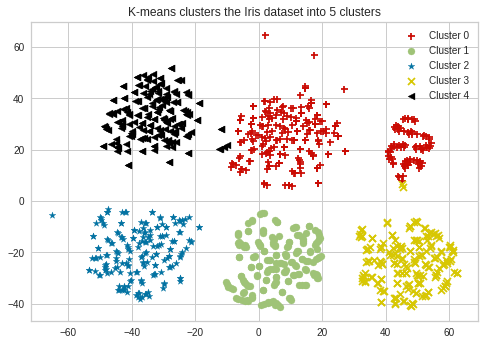

In [ ]:
for i in range(0, new_tf_tsne.shape[0]):
  if identified_clusters_tfidf[i] == 0:
    c1 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='r',
    marker='+')
  elif identified_clusters_tfidf[i] == 1:
    c2 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='g',
    marker='o')
  elif identified_clusters_tfidf[i] == 2:
    c3 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='b', marker='*')
  elif identified_clusters_tfidf[i] == 3:
    c4 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='y', marker='x')
  elif identified_clusters_tfidf[i] == 4:
    c5 = pl.scatter(new_tf_tsne[i,0],new_tf_tsne[i,1],c='black', marker='<')
pl.legend([c1, c2, c3 , c4 , c5],['Cluster 0', 'Cluster 1',
  'Cluster 2' , 'Cluster 3' , 'Cluster 4',])
pl.title('K-means clusters the Iris dataset into 5 clusters')
pl.show()

Counter({0: 267, 4: 189, 2: 185, 3: 180, 1: 179})


<BarContainer object of 5 artists>

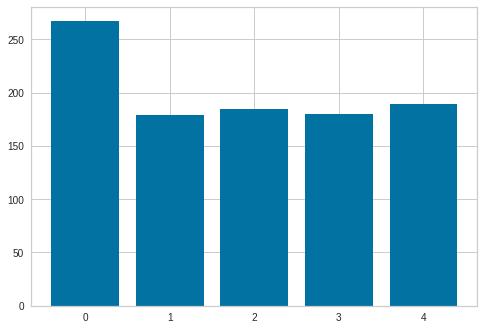

In [ ]:
counter_tfidf = Counter(identified_clusters_tfidf)
print(counter_tfidf)
plt.bar(counter_tfidf.keys(), counter_tfidf.values())

In [ ]:
#create new data frame with clusters lables for error analysis 
clustered_df=pd.DataFrame(df['partition'])
clustered_df['label']=kmeans_tfidf.labels_

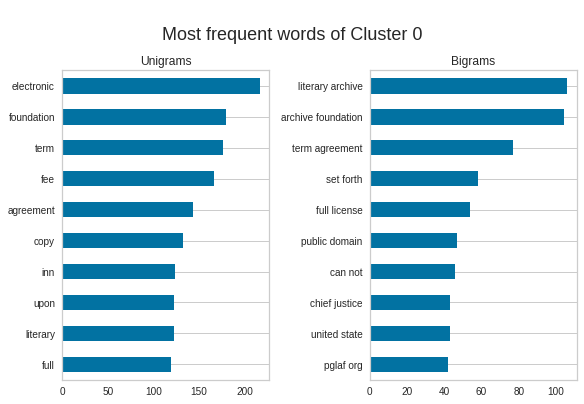

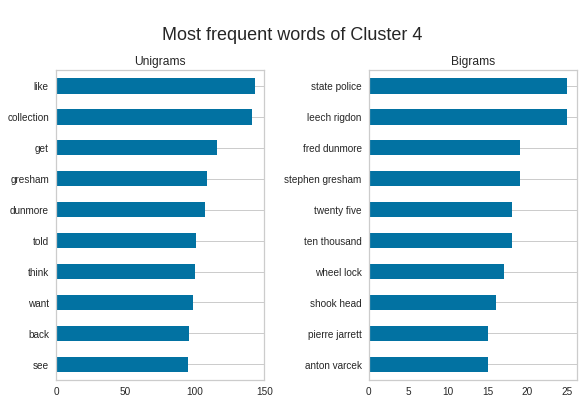

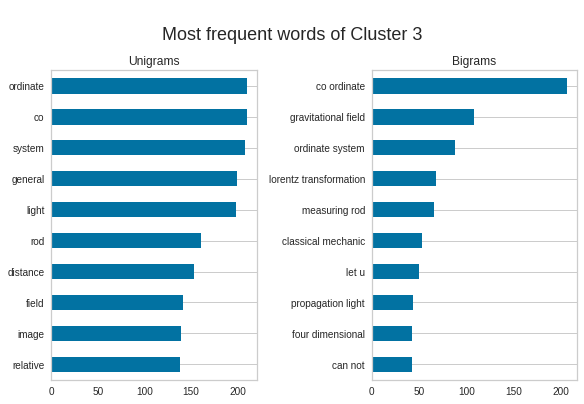

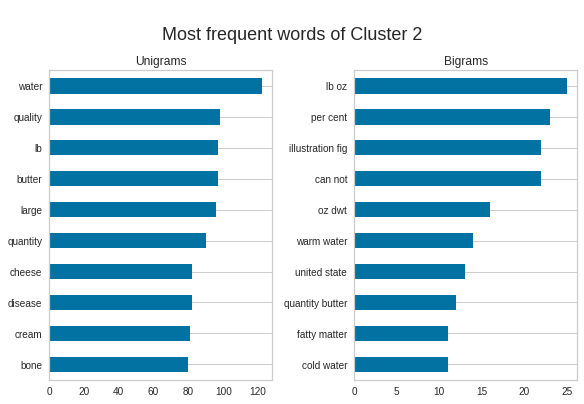

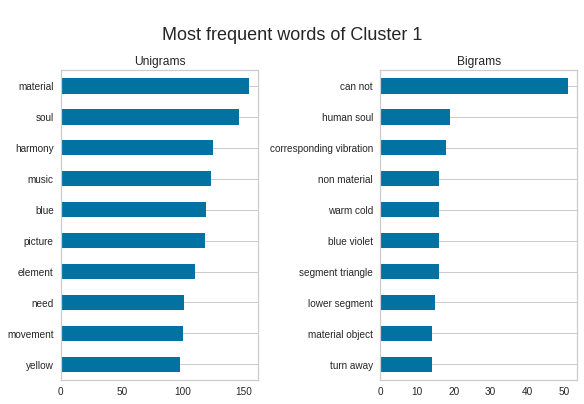

In [ ]:
#Analyis clusters word frequency
top= 10
for label in clustered_df['label'].unique():
    corpus = clustered_df[clustered_df["label"]==label]["partition"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    fig, ax = plt.subplots(nrows=1, ncols=2,constrained_layout=True)
    fig.suptitle(f"\n Most frequent words of Cluster {label} ", fontsize=18)

    ## unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    df_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax[0], 
                    legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
    ## bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    df_bi = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    df_bi["Word"] = df_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
    df_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
    ax[1].set(ylabel=None)

word cloud


 WordCloud of book 0



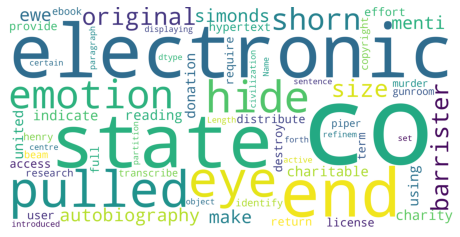


 WordCloud of book 4



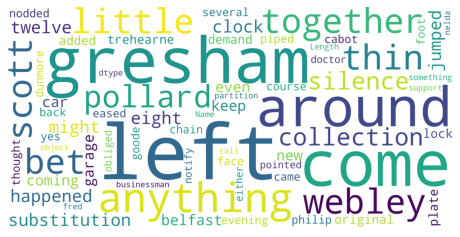


 WordCloud of book 3



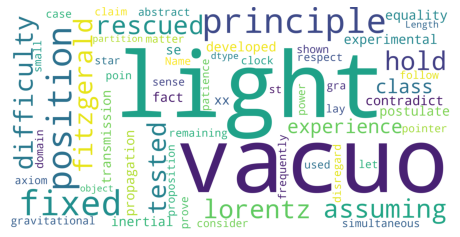


 WordCloud of book 2



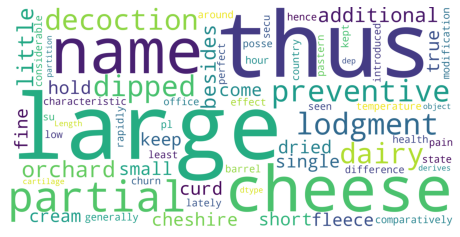


 WordCloud of book 1



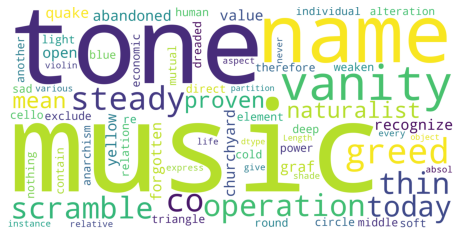

In [ ]:
for label in clustered_df['label'].unique():
    corpus = clustered_df[clustered_df["label"]==label]["partition"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    #wordcloud 
    print(f"\n WordCloud of book {label}\n")
    wc = wordcloud.WordCloud(background_color='white', max_words=150,width=1200, height=600, margin=4,scale=2, 
                          max_font_size=None)
    
    wc = wc.generate(str(corpus))
    fig = plt.figure(num=1)
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.show() 

In [ ]:
dists_tfidf = euclidean_distances(kmeans_tfidf.cluster_centers_)
kmeans_tfidf_dists = dists_tfidf[np.triu_indices(5, 1)]
max_dist_tfidf, avg_dist_tfidf, min_dist_tfidf = kmeans_tfidf_dists.max(), kmeans_tfidf_dists.mean(), kmeans_tfidf_dists.min()
max_dist_tfidf, avg_dist_tfidf, min_dist_tfidf

(98.12559, 61.92796, 41.732063)

In [ ]:
centroids_tfidf = kmeans_tfidf.cluster_centers_
distances_tfidf = []
for i, (cx, cy) in enumerate(centroids_tfidf):
    mean_distance_tfidf = k_mean_distance(new_tf_tsne, cx, cy, i, identified_clusters_tfidf)
    distances_tfidf.append(mean_distance_tfidf)
    print(distances_tfidf)
#mean dist within cluster
mean_dist_tfidf = []
for i in range(len(distances_tfidf)):
  mean_distance_tfidf.append(np.mean(distances_tfidf[i])) 
mean_distance_tfidf

[[27.557772495947066, 16.141394776706377, 30.342242141016676, 27.67857055643376, 22.57657488951196, 20.303058702067116, 15.084720826508322, 2.0624235477530917, 30.473472549941018, 6.8195276982390745, 34.190678501169316, 33.17960920915935, 13.798249150596808, 32.56920765802127, 26.554219204698533, 24.735752124162204, 28.857903520638754, 12.571600708707516, 16.92581682894061, 20.036325583134328, 22.916929131659113, 22.176633537623786, 18.330152456783434, 34.525441100593596, 19.540857421855158, 27.672810145823437, 20.121248681883987, 19.102951587072187, 22.72447577873729, 11.25587861067823, 20.306809650906306, 23.66524213625383, 17.613347999389728, 23.348384282306853, 25.441265558139285, 30.478690750290024, 6.227677119763465, 30.458298416772553, 21.35248449522316, 27.695283686283293, 10.64448027966952, 8.810796955554766, 24.193894013988572, 22.487998649924165, 26.757378860858626, 24.34892513023767, 19.664130312537146, 22.300638214971748, 19.525071591584826, 21.966782989016266, 18.45857774

[14.484209217886812,
 8.976478545665428,
 6.634104244636574,
 11.861858975493696,
 12.191206138283915,
 8.78883440352638,
 8.761701308534075,
 16.189535057485514,
 10.868088226951034,
 5.962617996128719,
 13.754930334501886,
 8.16583868803695,
 12.79256124766448,
 12.901404493608489,
 13.353767017192745,
 6.069867060938022,
 3.251501898137129,
 7.595044318833,
 5.58232294797562,
 11.935307651732492,
 15.155828624523233,
 11.144846538511233,
 13.14287879867599,
 15.779420214832246,
 25.52673046726302,
 14.310735754952615,
 21.763882193061054,
 14.068506274149085,
 11.828247339867316,
 11.711355084128355,
 4.9134124824073195,
 12.103872877692105,
 5.869282346407286,
 16.684142178074108,
 17.65583087372073,
 9.711119337115152,
 24.212465308865376,
 16.254693196110193,
 10.52841326387063,
 7.8514579576370265,
 14.783995807602217,
 4.0963924255311905,
 9.176054645166221,
 15.020107570912634,
 13.831847763730734,
 4.687257975631241,
 13.032490347340643,
 4.707176750988281,
 20.47012924535851

In [ ]:

score_tfidf_kmeans = silhouette_score(new_tf_tsne, identified_clusters_tfidf, metric='euclidean')
score_tfidf_kmeans

0.55856544

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d7b2c00d0>,
                     model=None)

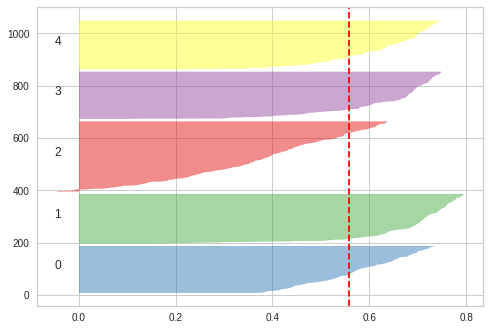

In [ ]:
visualizer_tfidf = SilhouetteVisualizer(kmeans_tfidf, colors='yellowbrick')
visualizer_tfidf.fit(new_tf_tsne) 

In [ ]:
kappa_tfidf_kmeans = cohen_kappa_score(df['labels_num'], cluster_tfidf.labels_)
kappa_tfidf_kmeans

-0.23124999999999996